In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

### Read the data as an appropriate Time Series data and plot the data.

In [110]:
df_Spark = pd.read_csv('Sparkling.csv', parse_dates=[0], index_col='YearMonth')
df_Rose = pd.read_csv('Rose.csv', parse_dates=[0], index_col='YearMonth')

In [111]:
print('Figure No. 1')
print('---------------------------')
print('Sample of Sparkling Wine Data Set')
df_Spark.head()

Figure No. 1
---------------------------
Sample of Sparkling Wine Data Set


Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

In [112]:
print('Figure No. 2')
print('---------------------------')
print('Sample of Red Wine Data Set')
df_Rose.head()

Figure No. 2
---------------------------
Sample of Red Wine Data Set


Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

Figure No. 3


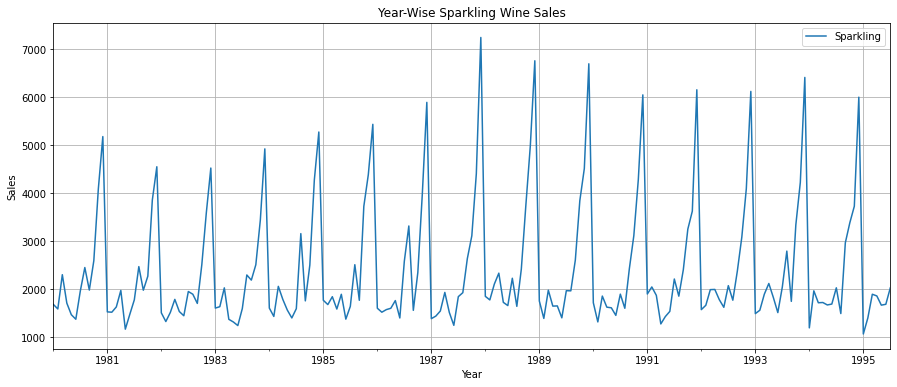

In [113]:
print('Figure No. 3')
plt.rcParams['figure.figsize'] = 15, 6
df_Spark.plot()
plt.title("Year-Wise Sparkling Wine Sales")
plt.xlabel('Year')
plt.ylabel('Sales')
plt.grid()
plt.show()

Figure No. 4


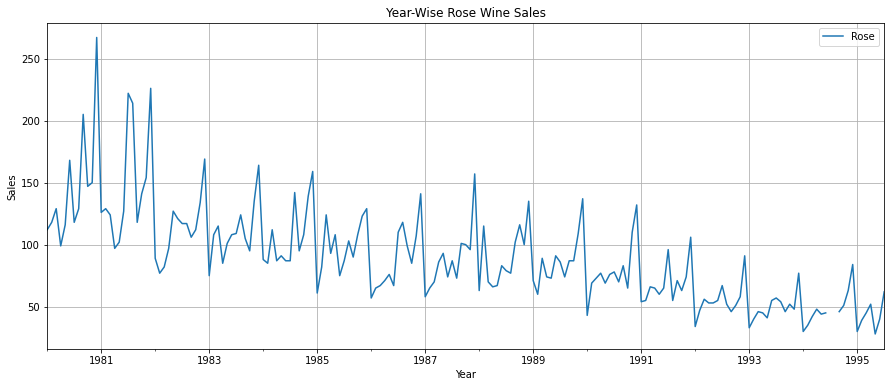

In [114]:
print('Figure No. 4')
df_Rose.plot()
plt.title("Year-Wise Rose Wine Sales")
plt.xlabel('Year')
plt.ylabel('Sales')
plt.grid()
plt.show()

### Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition

In [115]:
df_Spark.isnull().sum()

Sparkling    0
dtype: int64

In [506]:
df_Spark.describe().T

count         mean         std     min     25%     50%     75%  \
Sparkling  187.0  2402.417112  1295.11154  1070.0  1605.0  1874.0  2549.0   

              max  
Sparkling  7242.0

In [117]:
df_Rose.isnull().sum()

Rose    2
dtype: int64

In [118]:
df_Rose.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    185 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


In [507]:
df_Rose.describe().T

count       mean        std   min   25%   50%    75%    max
Rose  187.0  89.914439  39.238325  28.0  62.5  85.0  111.0  267.0

In [120]:
df_Rose.index.year.unique()

Int64Index([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
            1991, 1992, 1993, 1994, 1995],
           dtype='int64', name='YearMonth')

### Initial Observations:
1. Sparkling Wine data set contains 187 records of monthly sales.
2. It contains time period ranging from year 1980 to 1995.
3. Rose Wine data set contains 185 records for monthly sales.
4. It also contains time period ranging from year 1980 to 1995
5. There are no null values in Sparkling Wine Data set
6. There are 2 null values in Rose Wine Data set
7. Mean Sales of Sparkling Wine is 2402.42
8. Mean Sales of Rose Wine is 90.4
9. Minimum and Maximum sales of Sparkling Wine is 1070 and 7242 respectively.
10. Minimum and Maximum sales of Rose Wine is 28 and 267 respectively.

In [121]:
#imputing null values using interpolate
df_Rose = df_Rose.interpolate()

Figure No. 5


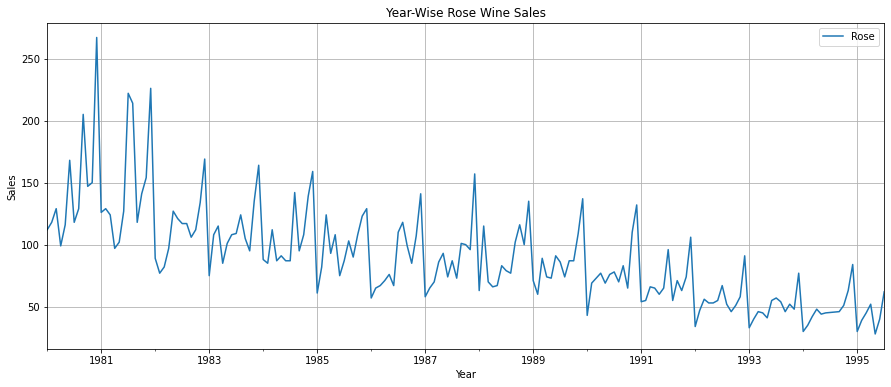

In [122]:
plt.rcParams['figure.figsize'] = 15, 6
print('Figure No. 5')
df_Rose.plot()
plt.title("Year-Wise Rose Wine Sales")
plt.xlabel('Year')
plt.ylabel('Sales')
plt.grid()
plt.show()

In [123]:
df_Rose.isnull().sum()

Rose    0
dtype: int64

In [124]:
yearly_sales_across_months = pd.pivot_table(df_Spark, values = 'Sparkling', columns = df_Spark.index.month_name(), 
                                        index = df_Spark.index.year)

print('Table No. 1')
print('Monthly-Breakup of Annual Sales - Sparkling Wine')
yearly_sales_across_months

Table No. 1
Monthly-Breakup of Annual Sales - Sparkling Wine


YearMonth   April  August  December  February  January    July    June  \
YearMonth                                                                
1980       1712.0  2453.0    5179.0    1591.0   1686.0  1966.0  1377.0   
1981       1976.0  2472.0    4551.0    1523.0   1530.0  1781.0  1480.0   
1982       1790.0  1897.0    4524.0    1329.0   1510.0  1954.0  1449.0   
1983       1375.0  2298.0    4923.0    1638.0   1609.0  1600.0  1245.0   
1984       1789.0  3159.0    5274.0    1435.0   1609.0  1597.0  1404.0   
1985       1589.0  2512.0    5434.0    1682.0   1771.0  1645.0  1379.0   
1986       1605.0  3318.0    5891.0    1523.0   1606.0  2584.0  1403.0   
1987       1935.0  1930.0    7242.0    1442.0   1389.0  1847.0  1250.0   
1988       2336.0  1645.0    6757.0    1779.0   1853.0  2230.0  1661.0   
1989       1650.0  1968.0    6694.0    1394.0   1757.0  1971.0  1406.0   
1990       1628.0  1605.0    6047.0    1321.0   1720.0  1899.0  1457.0   
1991       1279.0  1857.0    6153.0    2049.0   1902.0  2214.0  1540.0   
1992       1997.0  1773.0    6119.0    1667.0   1577.0  2076.0  1625.0   
1993       2121.0  2795.0    6410.0    1564.0   1494.0  2048.0  1515.0   
1994       1725.0  1495.0    5999.0    1968.0   1197.0  2031.0  1693.0   
1995       1862.0     NaN       NaN    1402.0   1070.0  2031.0  1688.0   

YearMonth   March     May  November  October  September  
YearMonth                                                
1980       2304.0  1471.0    4087.0   2596.0     1984.0  
1981       1633.0  1170.0    3857.0   2273.0     1981.0  
1982       1518.0  1537.0    3593.0   2514.0     1706.0  
1983       2030.0  1320.0    3440.0   2511.0     2191.0  
1984       2061.0  1567.0    4273.0   2504.0     1759.0  
1985       1846.0  1896.0    4388.0   3727.0     1771.0  
1986       1577.0  1765.0    3987.0   2349.0     1562.0  
1987       1548.0  1518.0    4405.0   3114.0     2638.0  
1988       2108.0  1728.0    4988.0   3740.0     2421.0  
1989       1982.0  1654.0    4514.0   3845.0     2608.0  
1990       1859.0  1615.0    4286.0   3116.0     2424.0  
1991       1874.0  1432.0    3627.0   3252.0     2408.0  
1992       1993.0  1783.0    4096.0   3088.0     2377.0  
1993       1898.0  1831.0    4227.0   3339.0     1749.0  
1994       1720.0  1674.0    3729.0   3385.0     2968.0  
1995       1897.0  1670.0       NaN      NaN        NaN

Figure No. 6


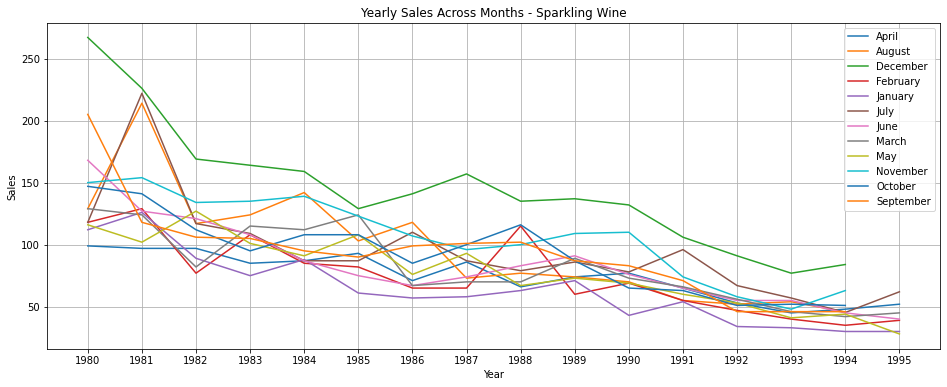

In [508]:
plt.rcParams['figure.figsize'] = 16, 6 
print('Figure No. 6')
yearly_sales_across_months.plot()
plt.legend(loc='best')
plt.title('Yearly Sales Across Months - Sparkling Wine')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.xticks(range(1980, 1996, 1))
plt.grid()
plt.show()

In [126]:
yearly_sales_across_months = pd.pivot_table(df_Rose, values = 'Rose', columns = df_Rose.index.month_name(), 
                                        index = df_Rose.index.year)

print('Table No. 2')
print('Monthly-Breakup of Annual Sales - Rose Wine')
yearly_sales_across_months

Table No. 2
Monthly-Breakup of Annual Sales - Rose Wine


YearMonth  April      August  December  February  January        July   June  \
YearMonth                                                                      
1980        99.0  129.000000     267.0     118.0    112.0  118.000000  168.0   
1981        97.0  214.000000     226.0     129.0    126.0  222.000000  127.0   
1982        97.0  117.000000     169.0      77.0     89.0  117.000000  121.0   
1983        85.0  124.000000     164.0     108.0     75.0  109.000000  108.0   
1984        87.0  142.000000     159.0      85.0     88.0   87.000000   87.0   
1985        93.0  103.000000     129.0      82.0     61.0   87.000000   75.0   
1986        71.0  118.000000     141.0      65.0     57.0  110.000000   67.0   
1987        86.0   73.000000     157.0      65.0     58.0   87.000000   74.0   
1988        66.0   77.000000     135.0     115.0     63.0   79.000000   83.0   
1989        74.0   74.000000     137.0      60.0     71.0   86.000000   91.0   
1990        77.0   70.000000     132.0      69.0     43.0   78.000000   76.0   
1991        65.0   55.000000     106.0      55.0     54.0   96.000000   65.0   
1992        53.0   52.000000      91.0      47.0     34.0   67.000000   55.0   
1993        45.0   54.000000      77.0      40.0     33.0   57.000000   55.0   
1994        48.0   45.666667      84.0      35.0     30.0   45.333333   45.0   
1995        52.0         NaN       NaN      39.0     30.0   62.000000   40.0   

YearMonth  March    May  November  October  September  
YearMonth                                              
1980       129.0  116.0     150.0    147.0      205.0  
1981       124.0  102.0     154.0    141.0      118.0  
1982        82.0  127.0     134.0    112.0      106.0  
1983       115.0  101.0     135.0     95.0      105.0  
1984       112.0   91.0     139.0    108.0       95.0  
1985       124.0  108.0     123.0    108.0       90.0  
1986        67.0   76.0     107.0     85.0       99.0  
1987        70.0   93.0      96.0    100.0      101.0  
1988        70.0   67.0     100.0    116.0      102.0  
1989        89.0   73.0     109.0     87.0       87.0  
1990        73.0   69.0     110.0     65.0       83.0  
1991        66.0   60.0      74.0     63.0       71.0  
1992        56.0   53.0      58.0     51.0       46.0  
1993        46.0   41.0      48.0     52.0       46.0  
1994        42.0   44.0      63.0     51.0       46.0  
1995        45.0   28.0       NaN      NaN        NaN

Figure No. 10


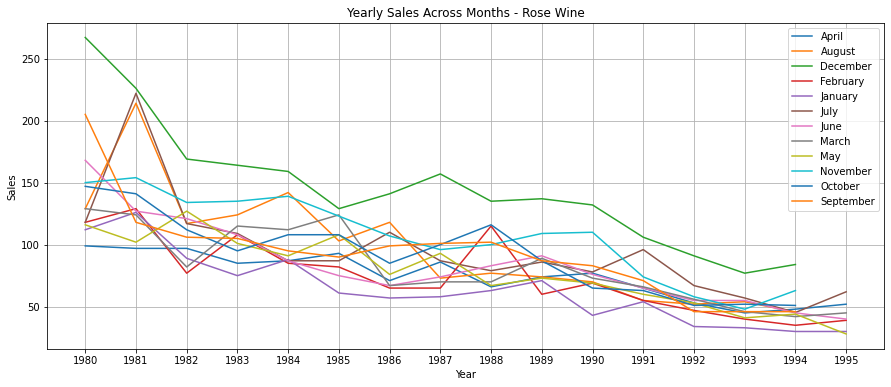

In [518]:
yearly_sales_across_months.plot()
print('Figure No. 10')
plt.legend(loc='best')
plt.title('Yearly Sales Across Months - Rose Wine')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.xticks(range(1980, 1996, 1))
plt.grid()
plt.show()

Figure No. 8


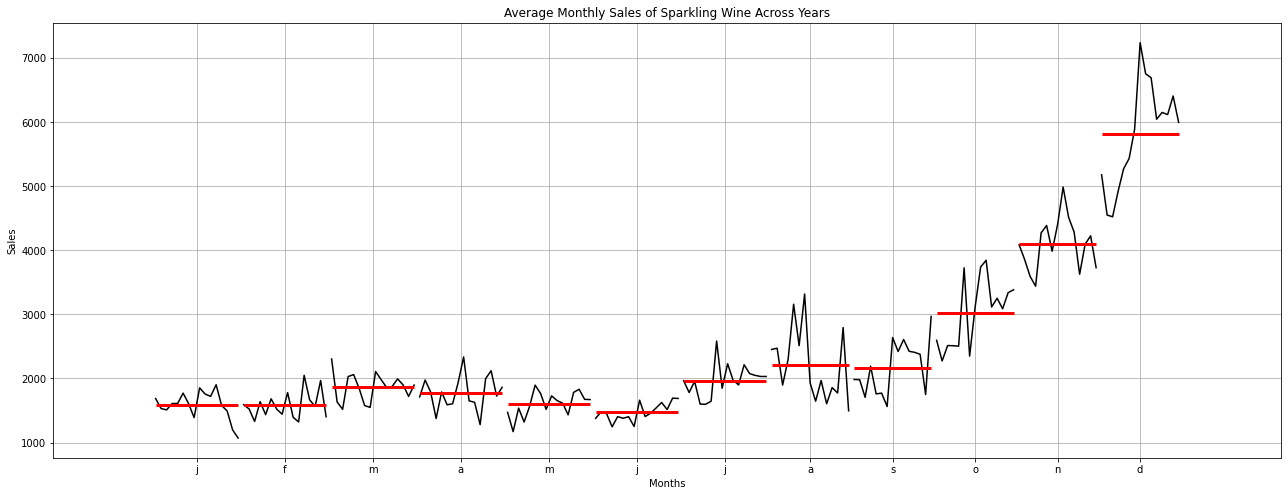

In [510]:
from statsmodels.graphics.tsaplots import month_plot
print('Figure No. 8')
zipig, ax = plt.subplots(figsize=(22,8))
month_plot(df_Spark,ylabel='Sales',ax=ax)
plt.title('Average Monthly Sales of Sparkling Wine Across Years')
plt.xlabel('Months')
plt.grid()

Figure No. 9


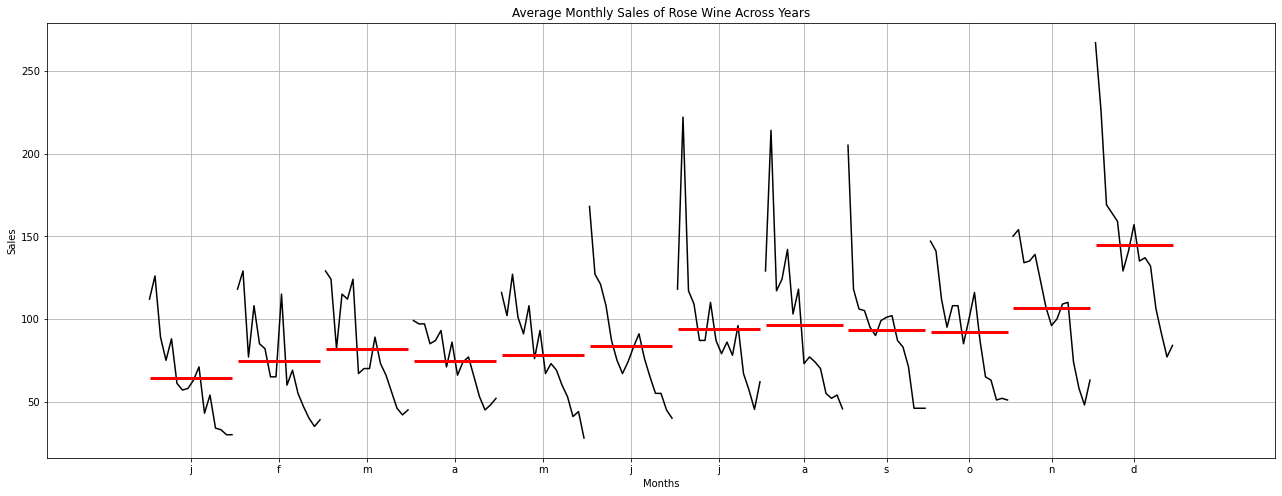

In [512]:
print('Figure No. 9')
fig, ax = plt.subplots(figsize=(22,8))
month_plot(df_Rose,ylabel='Sales',ax=ax)
plt.title('Average Monthly Sales of Rose Wine Across Years')
plt.xlabel('Months')
plt.grid()

In [129]:
#Yearly Plot
df_spark_yearly_sum = df_Spark.resample('A').sum()
df_spark_yearly_sum

Sparkling
YearMonth            
1980-12-31      28406
1981-12-31      26227
1982-12-31      25321
1983-12-31      26180
1984-12-31      28431
1985-12-31      29640
1986-12-31      29170
1987-12-31      30258
1988-12-31      33246
1989-12-31      31443
1990-12-31      28977
1991-12-31      29587
1992-12-31      30171
1993-12-31      30991
1994-12-31      29584
1995-12-31      11620

Figure No. 11


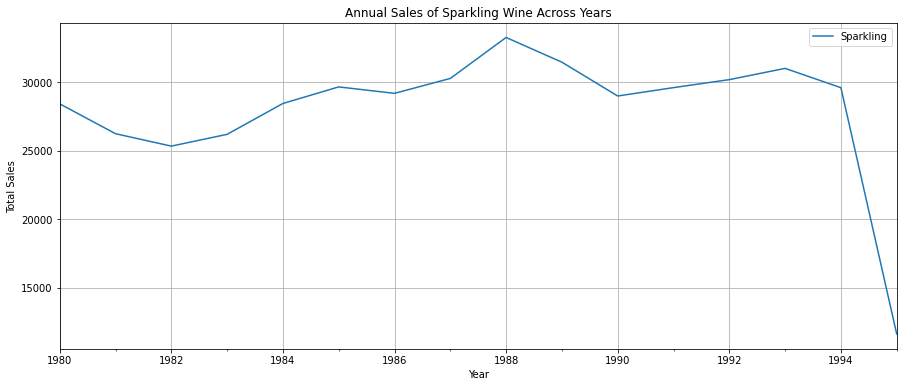

In [519]:
print('Figure No. 11')
df_spark_yearly_sum.plot()
plt.title('Annual Sales of Sparkling Wine Across Years')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid()
plt.show()

In [131]:
df_spark_quarterly_sum = df_Spark.resample('Q').sum()
df_spark_quarterly_sum.head()

Sparkling
YearMonth            
1980-03-31       5581
1980-06-30       4560
1980-09-30       6403
1980-12-31      11862
1981-03-31       4686

Figure No. 10


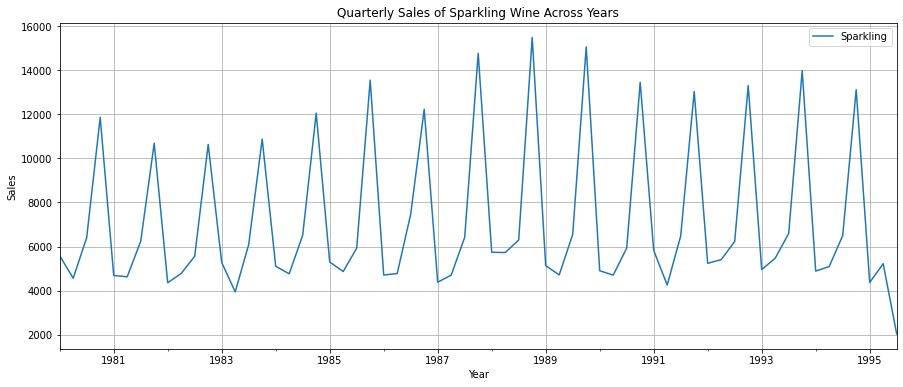

In [132]:
print('Figure No. 10')
df_spark_quarterly_sum.plot()
plt.title('Quarterly Sales of Sparkling Wine Across Years')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.grid()
plt.show()

In [133]:
df_rose_quarterly_sum = df_Rose.resample('Q').sum()
df_rose_quarterly_sum.head()

Rose
YearMonth        
1980-03-31  359.0
1980-06-30  383.0
1980-09-30  452.0
1980-12-31  564.0
1981-03-31  379.0

In [134]:
df_rose_quarterly_sum.sort_values(by='Rose', ascending=False).head()

Rose
YearMonth        
1980-12-31  564.0
1981-09-30  554.0
1981-12-31  521.0
1980-09-30  452.0
1982-12-31  415.0

In [520]:
df_spark_quarterly_sum.sort_values(by='Sparkling', ascending=False).head()

Sparkling
YearMonth            
1988-12-31      15485
1989-12-31      15053
1987-12-31      14761
1993-12-31      13976
1985-12-31      13549

In [522]:
df_rose_yearly_sum = df_Rose.resample('A').sum()

Figure No. 11


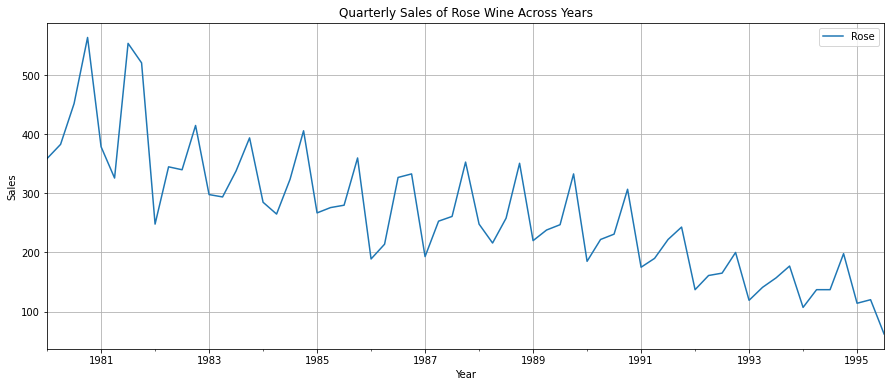

In [136]:
print('Figure No. 11')
df_rose_quarterly_sum.plot()
plt.title('Quarterly Sales of Rose Wine Across Years')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.grid()

Figure No. 11


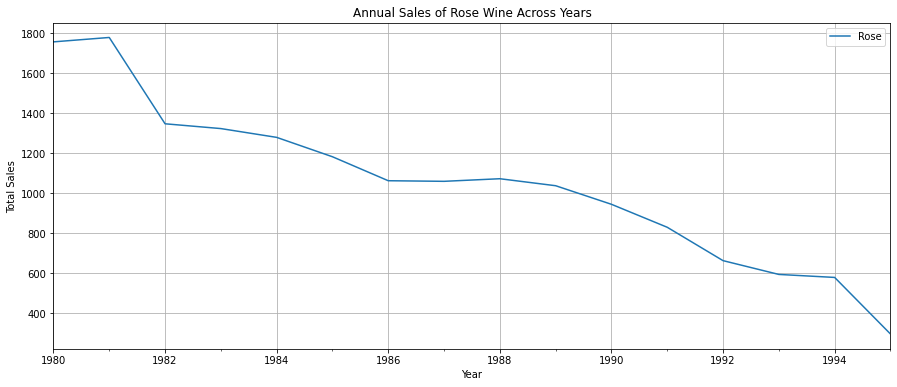

In [523]:
print('Figure No. 11')
df_rose_yearly_sum.plot()
plt.title('Annual Sales of Rose Wine Across Years')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid()
plt.show()

Figure No. 8


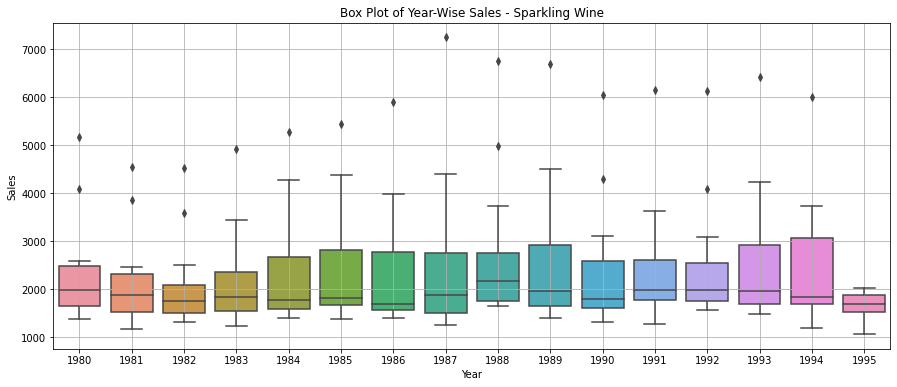

In [516]:
print('Figure No. 8')
sns.boxplot(x = df_Spark.index.year,y = df_Spark['Sparkling'])
plt.title('Box Plot of Year-Wise Sales - Sparkling Wine')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.grid();

Figure No. 12


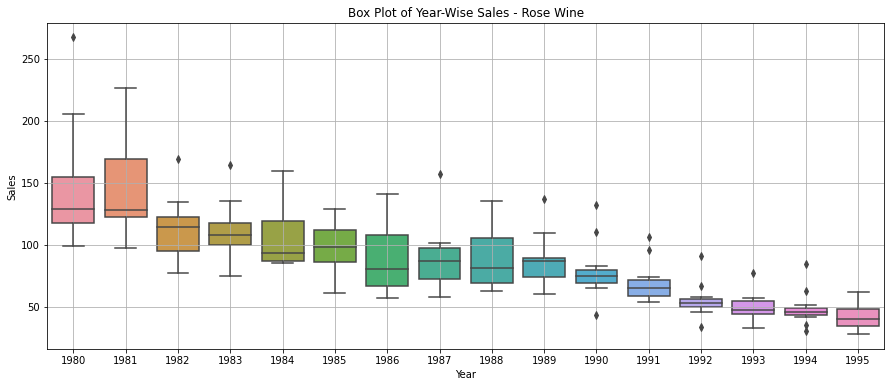

In [524]:
print('Figure No. 12')
sns.boxplot(x = df_Rose.index.year,y = df_Rose['Rose'])
plt.title('Box Plot of Year-Wise Sales - Rose Wine')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.grid();

Figure No. 9


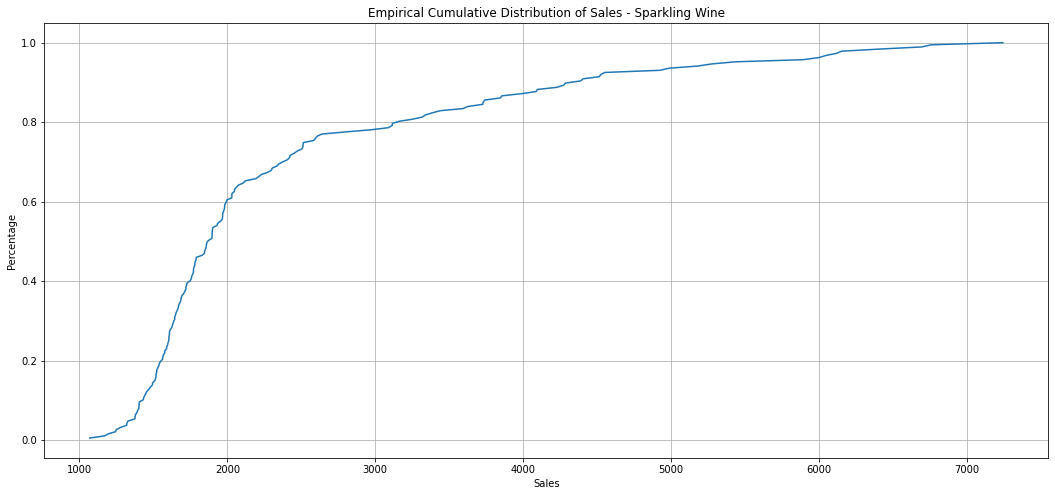

In [517]:
from statsmodels.distributions.empirical_distribution import ECDF
print('Figure No. 9')
plt.figure(figsize = (18, 8))
cdf = ECDF(df_Spark['Sparkling'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.title('Empirical Cumulative Distribution of Sales - Sparkling Wine')
plt.grid()
plt.ylabel('Percentage')
plt.xlabel('Sales');

Figure No. 13


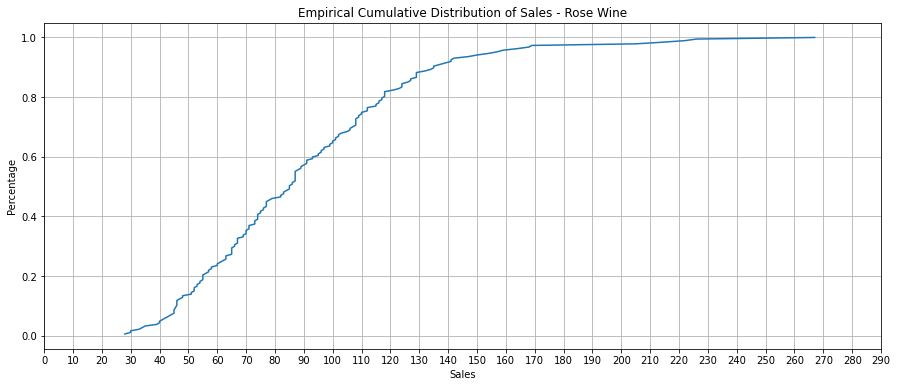

In [525]:
print('Figure No. 13')
cdf = ECDF(df_Rose['Rose'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.title('Empirical Cumulative Distribution of Sales - Rose Wine')
plt.grid()
plt.ylabel('Percentage')
plt.xlabel('Sales');
plt.xticks(range(0,300, 10));

In [526]:
average_spark    = df_Spark.groupby(df_Spark.index)["Sparkling"].mean()
pct_change_spark = df_Spark.groupby(df_Spark.index)["Sparkling"].sum().pct_change()

Figure No. 14


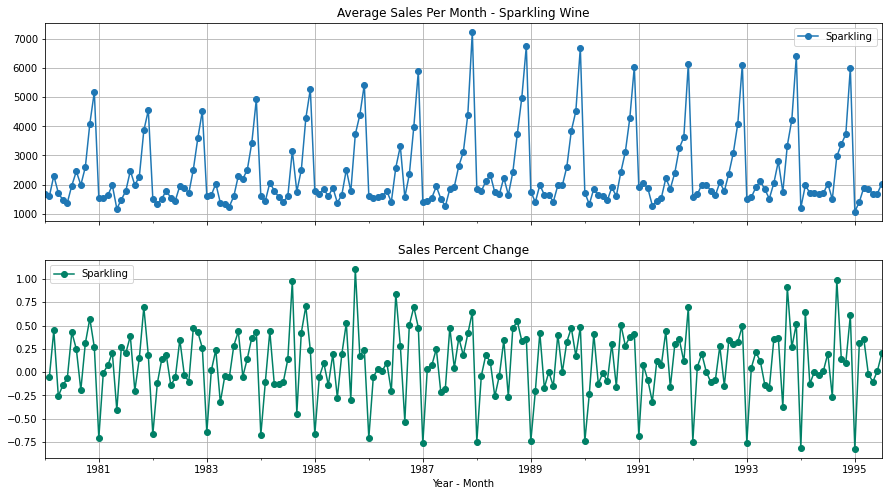

In [527]:
print('Figure No. 14')
fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average RetailSales over time(year-month)
ax1 = average_spark.plot(legend=True,ax=axis1,marker='o',title="Average Sales Per Month - Sparkling Wine",grid=True)
ax1.set_xticks(range(len(average_spark)))
ax1.set_xticklabels(average_spark.index.tolist())
# plot precent change for RetailSales over time(year-month)
ax2 = pct_change_spark.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Sales Percent Change",grid=True)
plt.xlabel('Year - Month');

Figure No. 15


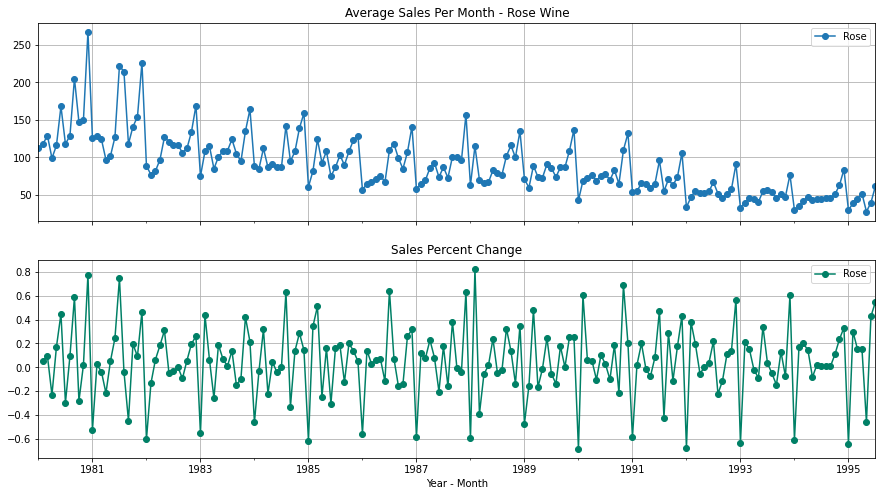

In [528]:
average_rose    = df_Rose.groupby(df_Rose.index)["Rose"].mean()
pct_change_rose = df_Rose.groupby(df_Rose.index)["Rose"].sum().pct_change()
print('Figure No. 15')
fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average RetailSales over time(year-month)
ax1 = average_rose.plot(legend=True,ax=axis1,marker='o',title="Average Sales Per Month - Rose Wine",grid=True)
ax1.set_xticks(range(len(average_rose)))
ax1.set_xticklabels(average_rose.index.tolist())
# plot precent change for RetailSales over time(year-month)
ax2 = pct_change_rose.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Sales Percent Change",grid=True)
plt.xlabel('Year - Month');

### EDA
1. 2 null values in the Rose Wine Data set has been imputed using interpolate function.
2. For Sparkling Wine - Year 1987, December has the highest sales of 7242.
3. For Rose Wine - Year 1980, September has the highest sales of 205.
4. 4th Quarter of year 1988 and 1980 has the highest sales with 15485 and 564 respectively for Sparkling and Rose Wine.
5. Both Data set exhibit trend and seasonality.
6. Sales for Rose wine has significanty plummeted over the years, showing a decline in sales figure.
7. The total sales across years for Sparkling Wine has dropped drastically for the year 1995. This is due to we do not have last 5 months sales figure for Year 1995 in the time series.
8. Boxplot shows presence of outliers in both Sparkling and Rose Wine Sales
9. The Empirical cummulative sales shows how much sales corresponds to what value of the percentage.
10. About 60% of the total sales in Sparkling Wine corresponds to 2000. While about 95 makes up 60% of the total sales in Rose Wine.
11. Figure 17 and 18 shows the average sales per month over time and the percentage change in sales per month over time.

### Decomposition

Figure No. 16
Additive Decomposition - Sparkling Wine


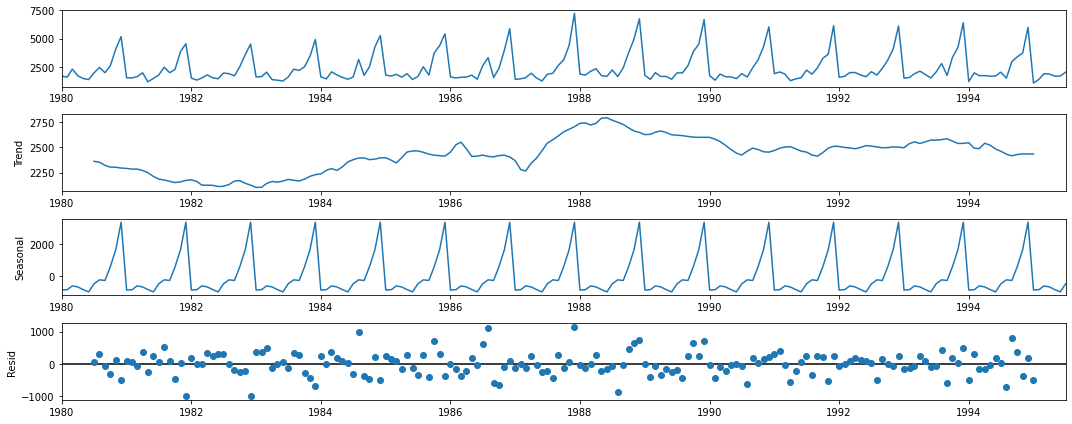

In [529]:
decompose_spark_add = seasonal_decompose(df_Spark, model='additive')
print('Figure No. 16')
print('Additive Decomposition - Sparkling Wine')
decompose_spark_add.plot();

Figure No. 17
Multiplicative Decomposition - Sparkling Wine


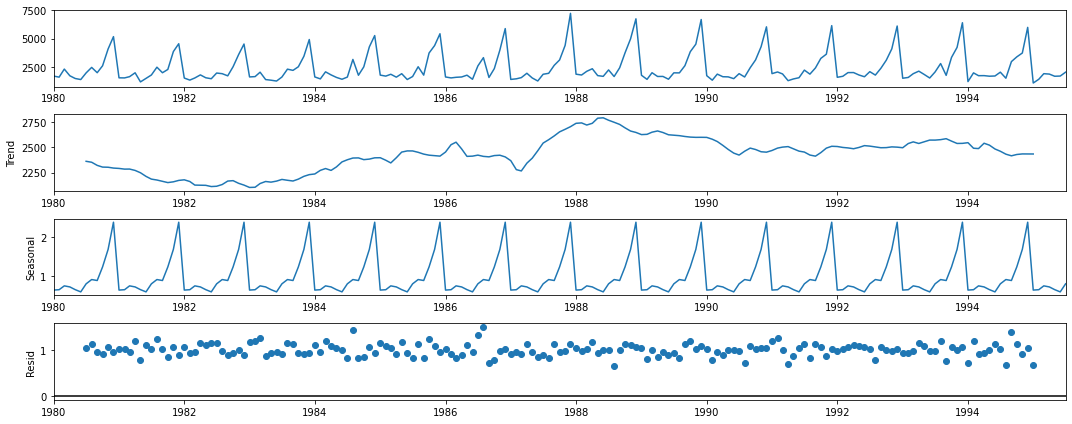

In [530]:
decompose_spark_mul = seasonal_decompose(df_Spark, model='multiplicative')
print('Figure No. 17')
print('Multiplicative Decomposition - Sparkling Wine')
decompose_spark_mul.plot();

Figure No. 18
Additive Decomposition - Rose Wine


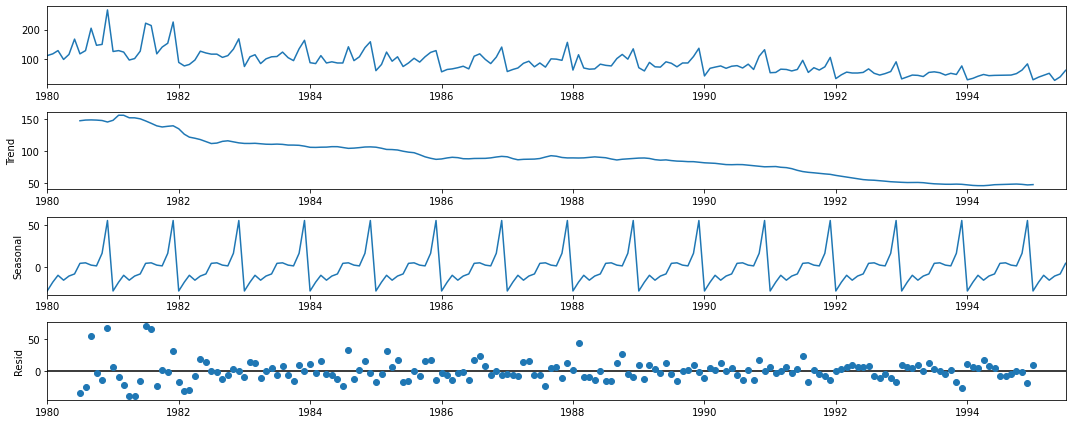

In [531]:
decompose_rose_add = seasonal_decompose(df_Rose, model='additive')
print('Figure No. 18')
print('Additive Decomposition - Rose Wine')
decompose_rose_add.plot();

Figure No. 19
Multiplicative Decomposition - Rose Wine


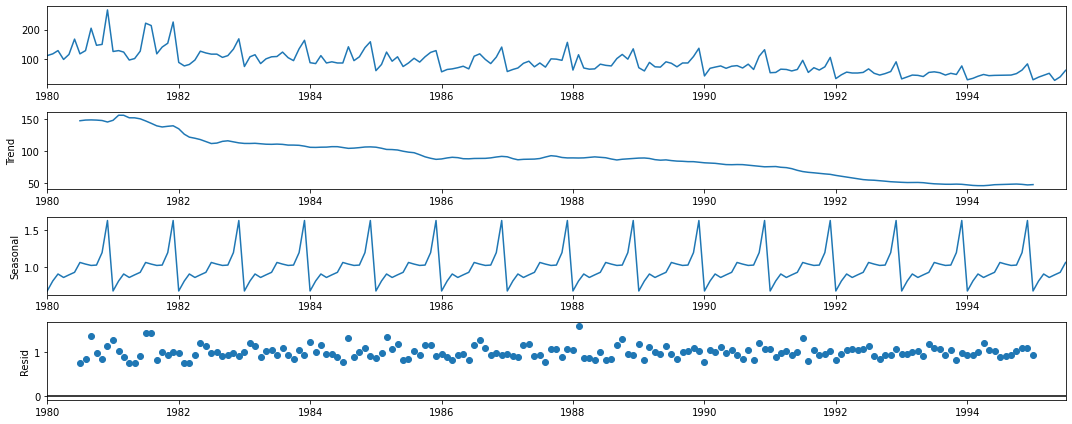

In [533]:
decompose_rose_mul = seasonal_decompose(df_Rose, model='multiplicative')
print('Figure No. 19')
print('Multiplicative Decomposition - Rose Wine')
decompose_rose_mul.plot();

In [149]:
trend_spark = decompose_spark_mul.trend
seasonality_spark = decompose_spark_mul.seasonal
residual_spark = decompose_spark_mul.resid

print('Trend','\n',trend_spark.head(10),'\n')
print('Seasonality','\n',seasonality_spark.head(10),'\n')
print('Residual','\n',residual_spark.head(10),'\n')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.649843
1980-02-01    0.659214
1980-03-01    0.757440
1980-04-01    0.730351
1980-05-01    0.660609
1980-06-01    0.603468
1980-07-01    0.809164
1980-08-01    0.918822
1980-09-01    0.894367
1980-10-01    1.241789
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    1.029230
1980-08-01    1.135407
1980-09-01    0.955954
1980-10-01    0.907513
Name: resid, dtype: float64 



In [534]:
trend_rose = decompose_rose_mul.trend
seasonality_rose = decompose_rose_mul.seasonal
residual_rose = decompose_rose_mul.resid

print('Trend','\n',trend_rose.head(10),'\n')
print('Seasonality','\n',seasonality_rose.head(10),'\n')
print('Residual','\n',residual_rose.head(10),'\n')

Trend 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.083333
1980-08-01    148.125000
1980-09-01    148.375000
1980-10-01    148.083333
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.670111
1980-02-01    0.806163
1980-03-01    0.901164
1980-04-01    0.854024
1980-05-01    0.889415
1980-06-01    0.923985
1980-07-01    1.058038
1980-08-01    1.035881
1980-09-01    1.017648
1980-10-01    1.022573
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    0.758258
1980-08-01    0.840720
1980-09-01    1.357674
1980-10-01    0.970771
Name: resid, dtype: float64 



1. Both trend and seasonality can be observed for Sparkling and Rose Wine Sales data set.
2. Residuals in additive models for both the data set displays some pattern as they are scattered all over. Additive models are somewhat ineffective in capturing information from the noise.
3. For Additive series, the residuals are located around 0. While for Multiplicative series residuals are located around 1.
4. Residuals in Multiplicative models for both the data set shows reduction in dispersion as they are more streamlined.
5. Between Additive and Multiplicative models, Multiplicative is the most suitable since the corresponding residuals from both the data set do not exhibit any pattern i.e. most of the information is captured from the noise.

### Split the data into training and test. The test data should start in 1991.

In [535]:
train_spark = df_Spark[df_Spark.index.year < 1991]
test_spark = df_Spark[df_Spark.index.year >= 1991]

In [545]:
print('Split of Train and Test Data for Sparkling Wine:')
print('_________________________________________________')
print('Number of rows in Train Data set is:', train_spark.shape[0])
print('Number of rows in Test Data set is:', test_spark.shape[0])

Split of Train and Test Data for Sparkling Wine:
_________________________________________________
Number of rows in Train Data set is: 132
Number of rows in Test Data set is: 55


In [546]:
print('Split of Train and Test Data for Rose Wine:')
print('_________________________________________________')
print('Number of rows in Train Data set is:', train_rose.shape[0])
print('Number of rows in Test Data set is:', test_rose.shape[0])

Split of Train and Test Data for Rose Wine:
_________________________________________________
Number of rows in Train Data set is: 132
Number of rows in Test Data set is: 55


In [153]:
test_spark.shape

(55, 1)

In [538]:
train_rose = df_Rose[df_Rose.index.year < 1991]
test_rose = df_Rose[df_Rose.index.year >= 1991]

In [547]:
train_rose.shape

(132, 1)

In [548]:
test_rose.shape

(55, 1)

Figure No. 20


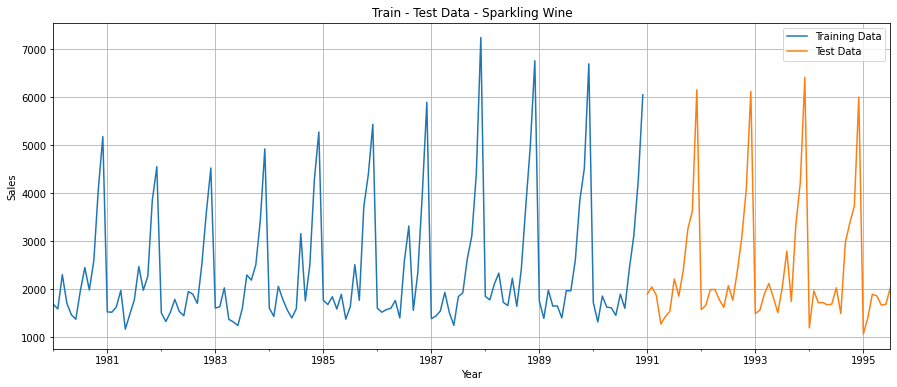

In [549]:
plt.rcParams['figure.figsize'] = 15, 6
print('Figure No. 20')
train_spark['Sparkling'].plot()
test_spark['Sparkling'].plot()
plt.grid()
plt.title('Train - Test Data - Sparkling Wine')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend(['Training Data','Test Data'])
plt.show()

Figure No. 21


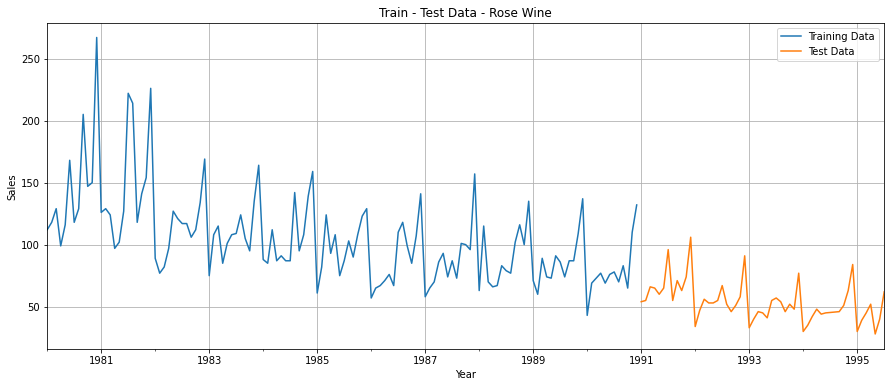

In [550]:
plt.rcParams['figure.figsize'] = 15, 6
print('Figure No. 21')
train_rose['Rose'].plot()
test_rose['Rose'].plot()
plt.grid()
plt.title('Train - Test Data - Rose Wine')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend(['Training Data','Test Data'])
plt.show()

### Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models and simple average models. should also be built on the training data and check the performance on the test data using RMSE.

### Linear Regression Model on Sparkling Wine

In [585]:
train_time = [i+1 for i in range(len(train_spark))]
test_time = [i+133 for i in range(len(test_spark))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [586]:
LinearRegression_train_spark = train_spark.copy()
LinearRegression_test_spark = test_spark.copy()

In [587]:
LinearRegression_train_spark['Time'] = train_time
LinearRegression_test_spark['Time'] = test_time

In [588]:
LinearRegression_train_spark.head()

Sparkling  Time
YearMonth                  
1980-01-01       1686     1
1980-02-01       1591     2
1980-03-01       2304     3
1980-04-01       1712     4
1980-05-01       1471     5

In [589]:
LinearRegression_test_spark.head()

Sparkling  Time
YearMonth                  
1991-01-01       1902   133
1991-02-01       2049   134
1991-03-01       1874   135
1991-04-01       1279   136
1991-05-01       1432   137

In [590]:
from sklearn.linear_model import LinearRegression

In [591]:
LR = LinearRegression()
LR.fit(LinearRegression_train_spark[['Time']], LinearRegression_train_spark['Sparkling'].values)

LinearRegression()

Figure No. 27


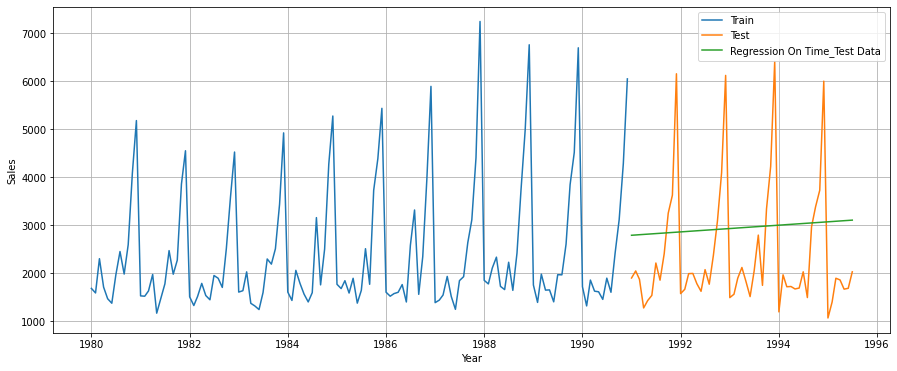

In [592]:
test_predictions_model1 = LR.predict(LinearRegression_test_spark[['Time']])
LinearRegression_test_spark['RegOnTime'] = test_predictions_model1

print('Figure No. 27')
plt.plot( train_spark['Sparkling'], label='Train')
plt.plot(test_spark['Sparkling'], label='Test')
plt.plot(LinearRegression_test_spark['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.grid();

### Linear Regression Model on Rose Wine

In [593]:
train_time = [i+1 for i in range(len(train_rose))]
test_time = [i+133 for i in range(len(test_rose))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [594]:
LinearRegression_train_rose = train_rose.copy()
LinearRegression_test_rose = test_rose.copy()

In [595]:
LinearRegression_train_rose['Time'] = train_time
LinearRegression_test_rose['Time'] = test_time

In [596]:
LinearRegression_train_rose.head()

Rose  Time
YearMonth              
1980-01-01  112.0     1
1980-02-01  118.0     2
1980-03-01  129.0     3
1980-04-01   99.0     4
1980-05-01  116.0     5

In [597]:
LinearRegression_test_rose.head()

Rose  Time
YearMonth             
1991-01-01  54.0   133
1991-02-01  55.0   134
1991-03-01  66.0   135
1991-04-01  65.0   136
1991-05-01  60.0   137

In [598]:
LR = LinearRegression()

In [599]:
LR.fit(LinearRegression_train_rose[['Time']], LinearRegression_train_rose['Rose'].values)

LinearRegression()

Figure No. 28


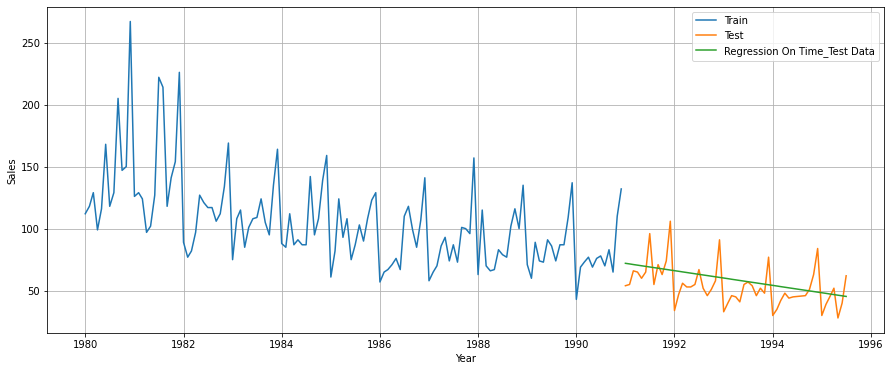

In [601]:
test_predictions_model2 = LR.predict(LinearRegression_test_rose[['Time']])
LinearRegression_test_rose['RegOnTime'] = test_predictions_model2

print('Figure No. 28')
plt.plot( train_rose['Rose'], label='Train')
plt.plot(test_rose['Rose'], label='Test')
plt.plot(LinearRegression_test_rose['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.grid();

### Model Evaluation

In [175]:
from sklearn import metrics

In [176]:
rmse_model1_test = metrics.mean_squared_error(test_spark['Sparkling'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data - Sparkling Wine,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data - Sparkling Wine,  RMSE is 1389.135


In [177]:
rmse_model2_test = metrics.mean_squared_error(test_rose['Rose'],test_predictions_model2,squared=False)
print("For RegressionOnTime forecast on the Test Data - Rose Wine,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data - Rose Wine,  RMSE is 15.269


In [178]:
resultsDf_spark = pd.DataFrame({'RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf_spark

RMSE
RegressionOnTime  1389.135175

In [179]:
resultsDf_rose = pd.DataFrame({'RMSE': [rmse_model2_test]},index=['RegressionOnTime'])
resultsDf_rose

RMSE
RegressionOnTime  15.268955

### Naive Model on Sparkling Wine

For this particular naive model, we say that the prediction for tomorrow is the same as today and the prediction for day after tomorrow is tomorrow and since the prediction of tomorrow is same as today,therefore the prediction for day after tomorrow is also today.

In [617]:
NaiveModel_train_spark = train_spark.copy()
NaiveModel_test_spark = test_spark.copy()

In [618]:
NaiveModel_test_spark['naive'] = np.asarray(train_spark['Sparkling'])[len(np.asarray(train_spark['Sparkling']))-1]
NaiveModel_test_spark['naive'].head()

YearMonth
1991-01-01    6047
1991-02-01    6047
1991-03-01    6047
1991-04-01    6047
1991-05-01    6047
Name: naive, dtype: int64

Figure No. 29


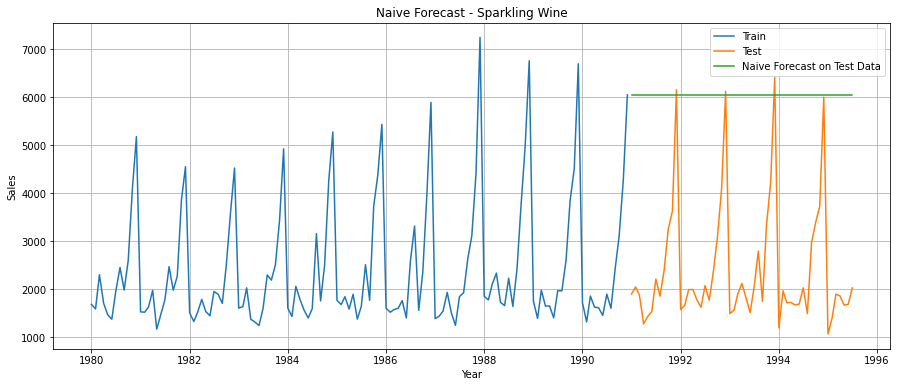

In [619]:
print('Figure No. 29')
plt.plot(NaiveModel_train_spark['Sparkling'], label='Train')
plt.plot(test_spark['Sparkling'], label='Test')
plt.plot(NaiveModel_test_spark['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast - Sparkling Wine")
plt.xlabel('Year')
plt.ylabel('Sales')
plt.grid();

In [621]:
rmse_model3_test = metrics.mean_squared_error(test_spark['Sparkling'],NaiveModel_test_spark['naive'],squared=False)
print("For Naive forecast on the Test Data - Sparkling Wine,  RMSE is %3.3f" %(rmse_model3_test))

For Naive forecast on the Test Data - Sparkling Wine,  RMSE is 3864.279


### Naive Model on Rose Wine

In [622]:
NaiveModel_train_rose = train_rose.copy()
NaiveModel_test_rose = test_rose.copy()

In [623]:
NaiveModel_test_rose['naive'] = np.asarray(train_rose['Rose'])[len(np.asarray(train_rose['Rose']))-1]
NaiveModel_test_rose['naive'].head()

YearMonth
1991-01-01    132.0
1991-02-01    132.0
1991-03-01    132.0
1991-04-01    132.0
1991-05-01    132.0
Name: naive, dtype: float64

Figure No. 30


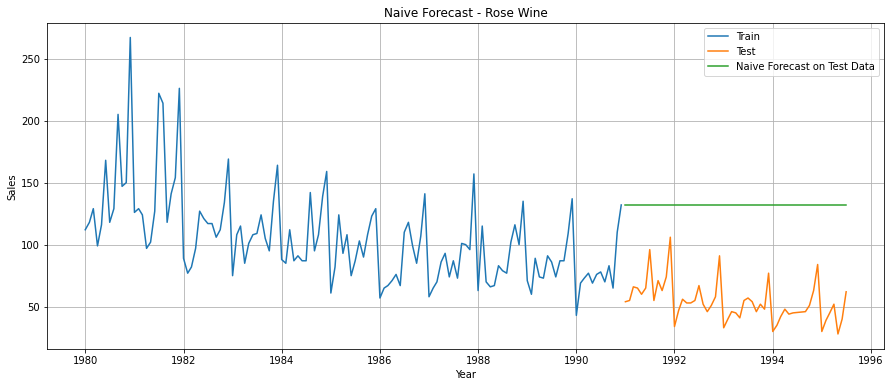

In [624]:
print('Figure No. 30')
plt.plot(NaiveModel_train_rose['Rose'], label='Train')
plt.plot(test_rose['Rose'], label='Test')
plt.plot(NaiveModel_test_rose['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast - Rose Wine")
plt.xlabel('Year')
plt.ylabel('Sales')
plt.grid();

### Model Evaluation

In [625]:
rmse_model4_test = metrics.mean_squared_error(test_rose['Rose'],NaiveModel_test_rose['naive'],squared=False)
print("For Naive forecast on the Test Data - Rose Wine,  RMSE is %3.3f" %(rmse_model4_test))

For Naive forecast on the Test Data - Rose Wine,  RMSE is 79.719


In [188]:
resultsDf_2 = pd.DataFrame({'RMSE': [rmse_model3_test]},index=['NaiveModel'])

resultsDf_spark = pd.concat([resultsDf_spark, resultsDf_2])
resultsDf_spark.drop_duplicates(inplace=True)
resultsDf_spark

RMSE
RegressionOnTime  1389.135175
NaiveModel        3864.279352

In [189]:
resultsDf_3 = pd.DataFrame({'RMSE': [rmse_model4_test]},index=['NaiveModel'])

resultsDf_rose = pd.concat([resultsDf_rose, resultsDf_3])
resultsDf_rose

RMSE
RegressionOnTime  15.268955
NaiveModel        79.718773

### Simple Average on Sparkling Wine

In [626]:
SimpleAverage_train_spark = train_spark.copy()
SimpleAverage_test_spark = test_spark.copy()

In [627]:
SimpleAverage_test_spark['mean_forecast'] = train_spark['Sparkling'].mean()
SimpleAverage_test_spark.head()

Sparkling  mean_forecast
YearMonth                           
1991-01-01       1902    2403.780303
1991-02-01       2049    2403.780303
1991-03-01       1874    2403.780303
1991-04-01       1279    2403.780303
1991-05-01       1432    2403.780303

Figure No. 31


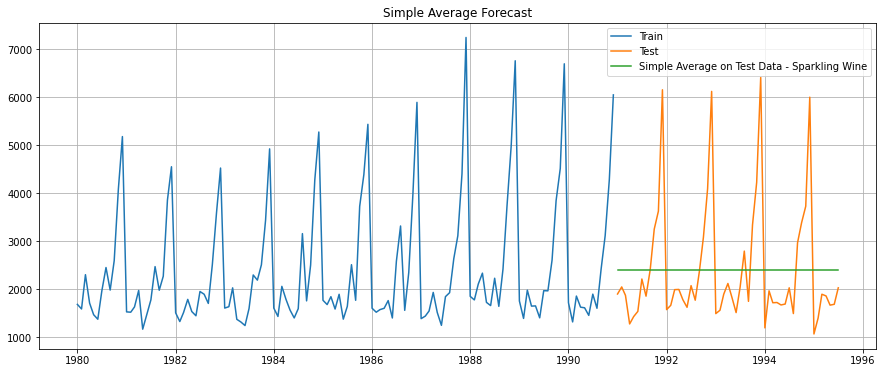

In [629]:
print('Figure No. 31')
plt.plot(SimpleAverage_train_spark['Sparkling'], label='Train')
plt.plot(SimpleAverage_test_spark['Sparkling'], label='Test')
plt.plot(SimpleAverage_test_spark['mean_forecast'], label='Simple Average on Test Data - Sparkling Wine')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [630]:
rmse_model5_test = metrics.mean_squared_error(test_spark['Sparkling'],SimpleAverage_test_spark['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data - Sparkling Wine,  RMSE is %3.3f" %(rmse_model5_test))

For Simple Average forecast on the Test Data - Sparkling Wine,  RMSE is 1275.082


### Simple Average on Rose Wine

In [631]:
SimpleAverage_train_rose = train_rose.copy()
SimpleAverage_test_rose = test_rose.copy()

In [632]:
SimpleAverage_test_rose['mean_forecast'] = train_rose['Rose'].mean()
SimpleAverage_test_rose.head()

Rose  mean_forecast
YearMonth                      
1991-01-01  54.0     104.939394
1991-02-01  55.0     104.939394
1991-03-01  66.0     104.939394
1991-04-01  65.0     104.939394
1991-05-01  60.0     104.939394

Figure No. 31


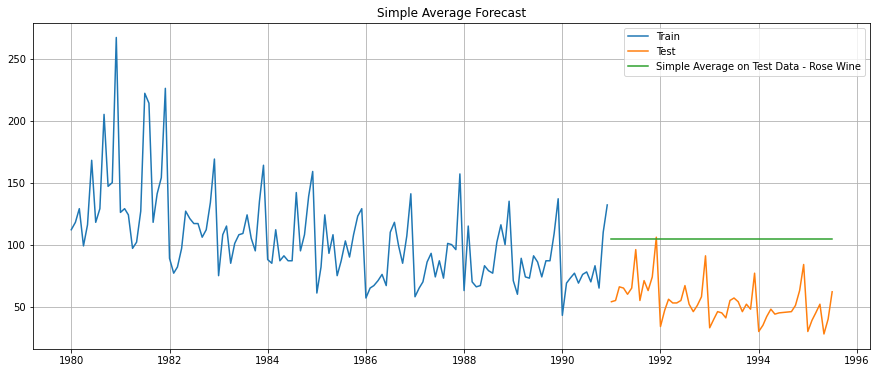

In [633]:
print('Figure No. 31')
plt.plot(SimpleAverage_train_rose['Rose'], label='Train')
plt.plot(SimpleAverage_test_rose['Rose'], label='Test')
plt.plot(SimpleAverage_test_rose['mean_forecast'], label='Simple Average on Test Data - Rose Wine')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [634]:
rmse_model6_test = metrics.mean_squared_error(test_rose['Rose'],SimpleAverage_test_rose['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data - Rose Wine,  RMSE is %3.3f" %(rmse_model6_test))

For Simple Average forecast on the Test Data - Rose Wine,  RMSE is 53.461


In [198]:
resultsDf_4 = pd.DataFrame({'RMSE': [rmse_model5_test]},index=['SimpleAverage'])

resultsDf_spark = pd.concat([resultsDf_spark, resultsDf_4])
resultsDf_spark

RMSE
RegressionOnTime  1389.135175
NaiveModel        3864.279352
SimpleAverage     1275.081804

In [199]:
resultsDf_5 = pd.DataFrame({'RMSE': [rmse_model6_test]},index=['SimpleAverage'])

resultsDf_rose = pd.concat([resultsDf_rose, resultsDf_5])
resultsDf_rose

RMSE
RegressionOnTime  15.268955
NaiveModel        79.718773
SimpleAverage     53.460570

### Moving Average Model - Sparkling Wine

In [635]:
MovingAverage_spark = df_Spark.copy()
MovingAverage_spark.head()

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

In [636]:
MovingAverage_spark['Trailing_2'] = MovingAverage_spark['Sparkling'].rolling(2).mean()
MovingAverage_spark['Trailing_4'] = MovingAverage_spark['Sparkling'].rolling(4).mean()
MovingAverage_spark['Trailing_6'] = MovingAverage_spark['Sparkling'].rolling(6).mean()
MovingAverage_spark['Trailing_9'] = MovingAverage_spark['Sparkling'].rolling(9).mean()
print('Table No. 3')
print('Moving Average - Sparkling Wine')
MovingAverage_spark.head()

Table No. 3
Moving Average - Sparkling Wine


Sparkling  Trailing_2  Trailing_4  Trailing_6  Trailing_9
YearMonth                                                            
1980-01-01       1686         NaN         NaN         NaN         NaN
1980-02-01       1591      1638.5         NaN         NaN         NaN
1980-03-01       2304      1947.5         NaN         NaN         NaN
1980-04-01       1712      2008.0     1823.25         NaN         NaN
1980-05-01       1471      1591.5     1769.50         NaN         NaN

Figure No. 32


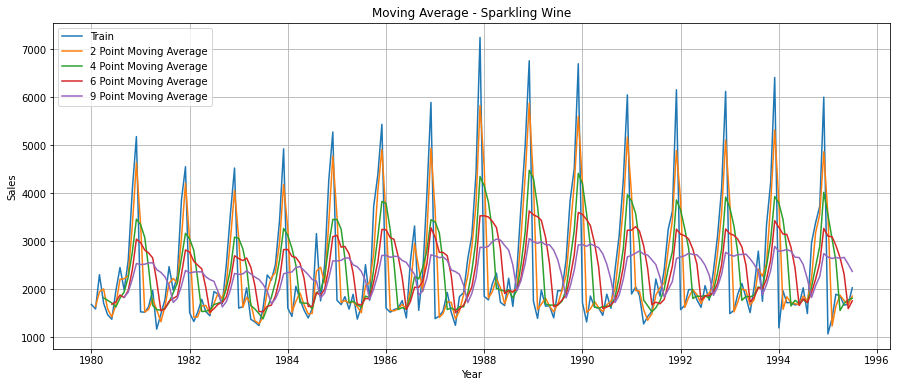

In [637]:
print('Figure No. 32')
plt.plot(MovingAverage_spark['Sparkling'], label='Train')
plt.plot(MovingAverage_spark['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage_spark['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage_spark['Trailing_6'], label ='6 Point Moving Average')
plt.plot(MovingAverage_spark['Trailing_9'], label ='9 Point Moving Average')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend(loc = 'best')
plt.title('Moving Average - Sparkling Wine', loc='Center')
plt.grid();

In [638]:
trailing_MovingAverage_train_spark=MovingAverage_spark[MovingAverage_spark.index.year < 1991] 
trailing_MovingAverage_test_spark=MovingAverage_spark[MovingAverage_spark.index.year >= 1991]

Figure No. 33


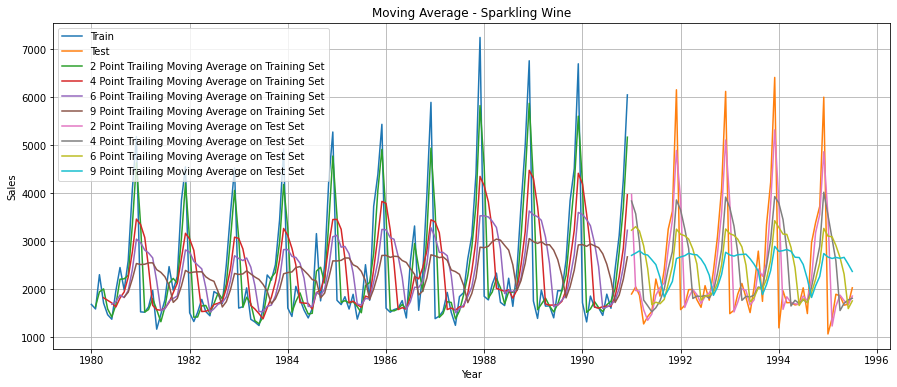

In [640]:
print('Figure No. 33')
plt.plot(trailing_MovingAverage_train_spark['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test_spark['Sparkling'], label='Test')

plt.plot(trailing_MovingAverage_train_spark['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train_spark['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train_spark['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train_spark['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test_spark['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test_spark['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test_spark['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test_spark['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Moving Average - Sparkling Wine', loc='Center')
plt.legend(loc = 'best')
plt.grid();

In [641]:
rmse_model7_test_2 = metrics.mean_squared_error(test_spark['Sparkling'],trailing_MovingAverage_test_spark['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model7_test_2))


rmse_model7_test_4 = metrics.mean_squared_error(test_spark['Sparkling'],trailing_MovingAverage_test_spark['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model7_test_4))


rmse_model7_test_6 = metrics.mean_squared_error(test_spark['Sparkling'],trailing_MovingAverage_test_spark['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model7_test_6))


rmse_model7_test_9 = metrics.mean_squared_error(test_spark['Sparkling'],trailing_MovingAverage_test_spark['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(rmse_model7_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 813.401
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 1156.590
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 1283.927
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 1346.278 


In [206]:
results = pd.DataFrame({'RMSE': [rmse_model7_test_2,rmse_model7_test_4
                                          ,rmse_model7_test_6,rmse_model7_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf_spark = pd.concat([resultsDf_spark, results])
resultsDf_spark

RMSE
RegressionOnTime             1389.135175
NaiveModel                   3864.279352
SimpleAverage                1275.081804
2pointTrailingMovingAverage   813.400684
4pointTrailingMovingAverage  1156.589694
6pointTrailingMovingAverage  1283.927428
9pointTrailingMovingAverage  1346.278315

### Moving Average - Rose Wine

In [642]:
MovingAverage_rose = df_Rose.copy()
MovingAverage_rose.head()

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

In [643]:
MovingAverage_rose['Trailing_2'] = MovingAverage_rose['Rose'].rolling(2).mean()
MovingAverage_rose['Trailing_4'] = MovingAverage_rose['Rose'].rolling(4).mean()
MovingAverage_rose['Trailing_6'] = MovingAverage_rose['Rose'].rolling(6).mean()
MovingAverage_rose['Trailing_9'] = MovingAverage_rose['Rose'].rolling(9).mean()
print('Table No. 4')
print('Moving Average - Rose Wine')
MovingAverage_rose.head()

Table No. 4
Moving Average - Rose Wine


Rose  Trailing_2  Trailing_4  Trailing_6  Trailing_9
YearMonth                                                        
1980-01-01  112.0         NaN         NaN         NaN         NaN
1980-02-01  118.0       115.0         NaN         NaN         NaN
1980-03-01  129.0       123.5         NaN         NaN         NaN
1980-04-01   99.0       114.0       114.5         NaN         NaN
1980-05-01  116.0       107.5       115.5         NaN         NaN

Figure No. 34


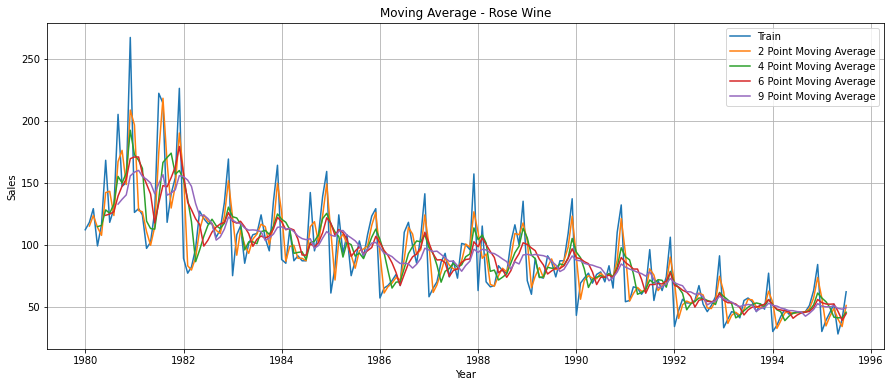

In [644]:
print('Figure No. 34')
plt.plot(MovingAverage_rose['Rose'], label='Train')
plt.plot(MovingAverage_rose['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage_rose['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage_rose['Trailing_6'], label ='6 Point Moving Average')
plt.plot(MovingAverage_rose['Trailing_9'], label ='9 Point Moving Average')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend(loc = 'best')
plt.title('Moving Average - Rose Wine', loc='Center')
plt.grid();

In [645]:
trailing_MovingAverage_train_rose=MovingAverage_rose[MovingAverage_rose.index.year < 1991] 
trailing_MovingAverage_test_rose=MovingAverage_rose[MovingAverage_rose.index.year >= 1991]

Figure No. 35


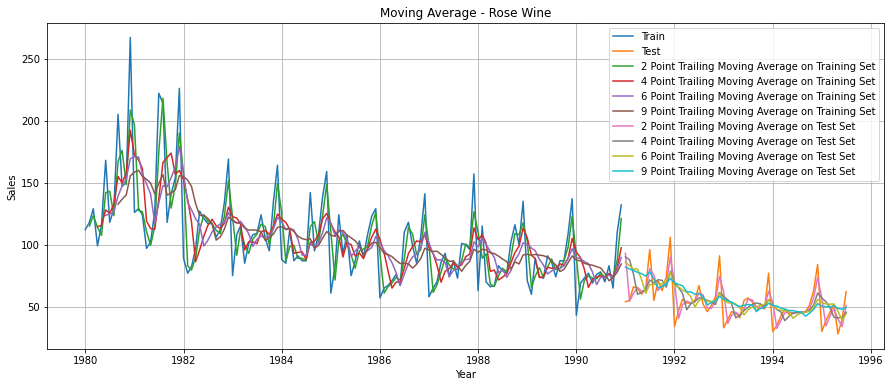

In [646]:
print('Figure No. 35')
plt.plot(trailing_MovingAverage_train_rose['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test_rose['Rose'], label='Test')

plt.plot(trailing_MovingAverage_train_rose['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train_rose['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train_rose['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train_rose['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test_rose['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test_rose['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test_rose['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test_rose['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Moving Average - Rose Wine', loc='Center')
plt.legend(loc = 'best')
plt.grid();

In [647]:
rmse_model8_test_2 = metrics.mean_squared_error(test_rose['Rose'],trailing_MovingAverage_test_rose['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model8_test_2))


rmse_model8_test_4 = metrics.mean_squared_error(test_rose['Rose'],trailing_MovingAverage_test_rose['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model8_test_4))


rmse_model8_test_6 = metrics.mean_squared_error(test_rose['Rose'],trailing_MovingAverage_test_rose['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model8_test_6))


rmse_model8_test_9 = metrics.mean_squared_error(test_rose['Rose'],trailing_MovingAverage_test_rose['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(rmse_model8_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 11.529
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 14.451
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 14.566
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 14.728 


In [213]:
results = pd.DataFrame({'RMSE': [rmse_model8_test_2,rmse_model8_test_4
                                          ,rmse_model8_test_6,rmse_model8_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf_rose = pd.concat([resultsDf_rose, results])
resultsDf_rose

RMSE
RegressionOnTime             15.268955
NaiveModel                   79.718773
SimpleAverage                53.460570
2pointTrailingMovingAverage  11.529278
4pointTrailingMovingAverage  14.451403
6pointTrailingMovingAverage  14.566327
9pointTrailingMovingAverage  14.727630

Figure No. 36


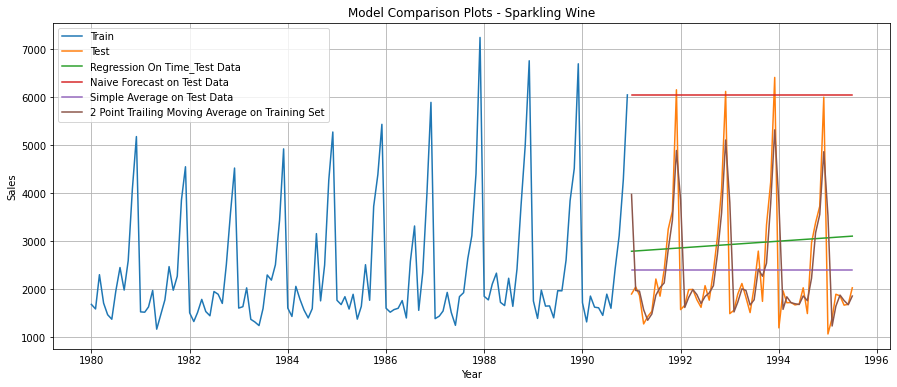

In [651]:
print('Figure No. 36')
plt.plot(train_spark['Sparkling'], label='Train')
plt.plot(test_spark['Sparkling'], label='Test')

plt.plot(LinearRegression_test_spark['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(NaiveModel_test_spark['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test_spark['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test_spark['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')

plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend(loc='best')
plt.title("Model Comparison Plots - Sparkling Wine")
plt.grid();

Figure No. 37


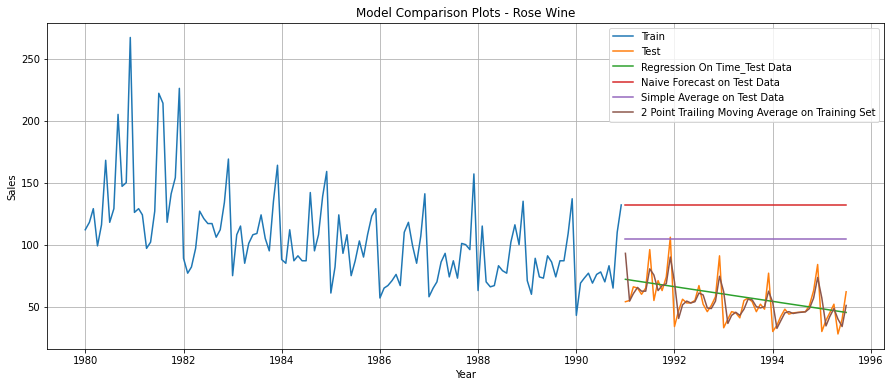

In [652]:
print('Figure No. 37')
plt.plot(train_rose['Rose'], label='Train')
plt.plot(test_rose['Rose'], label='Test')

plt.plot(LinearRegression_test_rose['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(NaiveModel_test_rose['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test_rose['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test_rose['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')

plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend(loc='best')
plt.title("Model Comparison Plots - Rose Wine")
plt.grid();

In [217]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

### Simple Exponential Smoothening - Sparkling Wine

In [218]:
SES_train_spark = train_spark.copy()
SES_test_spark = test_spark.copy()

In [219]:
model_SES = SimpleExpSmoothing(SES_train_spark['Sparkling'])
model_SES_autofit = model_SES.fit(optimized=True)

In [220]:
model_SES_autofit.params

{'smoothing_level': 0.04960659880745982,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1818.5047538435374,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [221]:
SES_test_spark['predict'] = model_SES_autofit.forecast(steps=len(SES_test_spark))
SES_test_spark.head()

Sparkling      predict
YearMonth                         
1991-01-01       1902  2724.929339
1991-02-01       2049  2724.929339
1991-03-01       1874  2724.929339
1991-04-01       1279  2724.929339
1991-05-01       1432  2724.929339

Figure No. 22


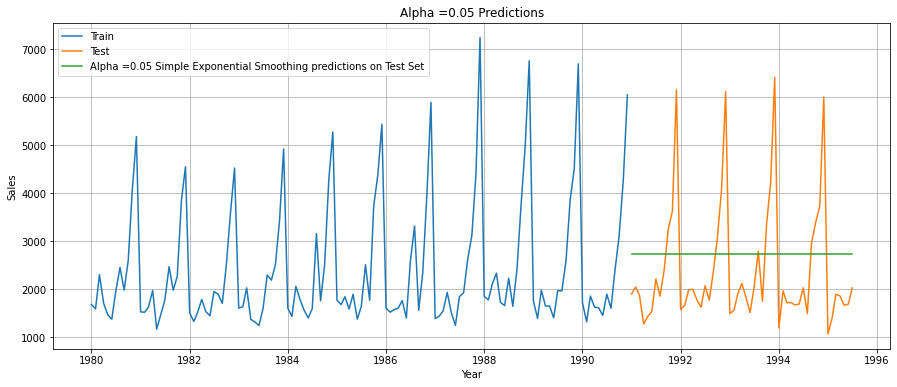

In [551]:
print('Figure No. 22')
plt.plot(SES_train_spark['Sparkling'], label='Train')
plt.plot(SES_test_spark['Sparkling'], label='Test')
plt.plot(SES_test_spark['predict'], label='Alpha =0.05 Simple Exponential Smoothing predictions on Test Set')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.05 Predictions');

### Model Evaluation for alpha = 0.05

In [223]:
rmse_SES_model1 = metrics.mean_squared_error(SES_test_spark['Sparkling'],SES_test_spark['predict'],squared=False)
print("For Alpha =0.05, Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_SES_model1))

For Alpha =0.05, Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 1316.035


In [225]:
resultsSES_1 = pd.DataFrame({'RMSE': [rmse_SES_model1]},index=['Alpha=0.05,SimpleExponentialSmoothing'])

resultsDf_spark = pd.concat([resultsDf_spark, resultsSES_1])

In [226]:
resultsDf_spark

RMSE
RegressionOnTime                       1389.135175
NaiveModel                             3864.279352
SimpleAverage                          1275.081804
2pointTrailingMovingAverage             813.400684
4pointTrailingMovingAverage            1156.589694
6pointTrailingMovingAverage            1283.927428
9pointTrailingMovingAverage            1346.278315
Alpha=0.05,SimpleExponentialSmoothing  1316.034674

In [227]:
RMSE_spark = pd.DataFrame({'Alpha Values':[],'Test RMSE': []})
for i in np.arange(0,1,0.01):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train_spark['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test_spark['predict',i] = model_SES_alpha_i.forecast(steps=len(SES_test_spark))
    
    rmse_model_test_i = metrics.mean_squared_error(SES_test_spark['Sparkling'],SES_test_spark['predict',i],squared=False)
    
    RMSE_spark = RMSE_spark.append({'Alpha Values':i,'Test RMSE':rmse_model_test_i}, ignore_index=True)

In [228]:
RMSE_spark.sort_values(by='Test RMSE').head()

Alpha Values    Test RMSE
2          0.02  1279.495201
1          0.01  1281.032699
3          0.03  1293.110073
4          0.04  1305.462953
5          0.05  1316.411742

In [229]:
resultsSES_11 = pd.DataFrame({'RMSE': [RMSE_spark.sort_values(by='Test RMSE').values[0][1]]},index=['Alpha=0.02,SimpleExponentialSmoothing'])

resultsDf_spark = pd.concat([resultsDf_spark, resultsSES_11])

In [230]:
resultsDf_spark

RMSE
RegressionOnTime                       1389.135175
NaiveModel                             3864.279352
SimpleAverage                          1275.081804
2pointTrailingMovingAverage             813.400684
4pointTrailingMovingAverage            1156.589694
6pointTrailingMovingAverage            1283.927428
9pointTrailingMovingAverage            1346.278315
Alpha=0.05,SimpleExponentialSmoothing  1316.034674
Alpha=0.02,SimpleExponentialSmoothing  1279.495201

### Simple Exponential Smoothening - Rose Wine

In [231]:
SES_train_rose = train_rose.copy()
SES_test_rose = test_rose.copy()

In [232]:
model_SES_rose = SimpleExpSmoothing(SES_train_rose['Rose'])
model_SES_rose_autofit = model_SES_rose.fit(optimized=True)

In [233]:
model_SES_rose_autofit.params

{'smoothing_level': 0.09874989743650385,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.38699692184085,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [234]:
SES_test_rose['predict'] = model_SES_rose_autofit.forecast(steps=len(SES_test_rose))
SES_test_rose.head()

Rose    predict
YearMonth                  
1991-01-01  54.0  87.104999
1991-02-01  55.0  87.104999
1991-03-01  66.0  87.104999
1991-04-01  65.0  87.104999
1991-05-01  60.0  87.104999

Figure No. 23


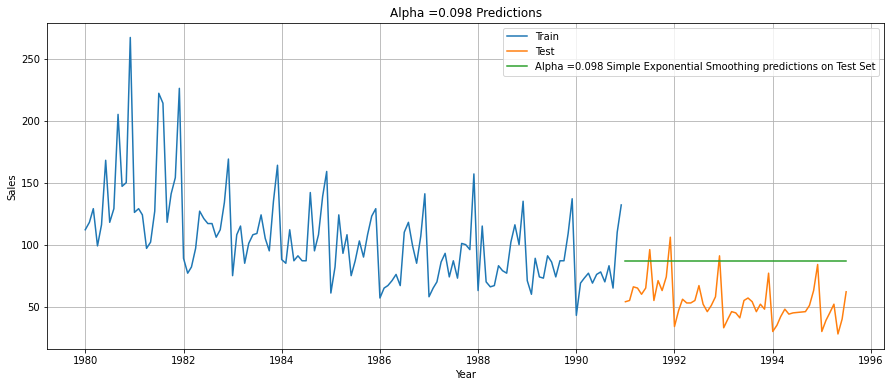

In [552]:
print('Figure No. 23')
plt.plot(SES_train_rose['Rose'], label='Train')
plt.plot(SES_test_rose['Rose'], label='Test')
plt.plot(SES_test_rose['predict'], label='Alpha =0.098 Simple Exponential Smoothing predictions on Test Set')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.098 Predictions');

### Model evaluation for alpha = 0.098

In [236]:
rmse_SES_model2 = metrics.mean_squared_error(SES_test_rose['Rose'],SES_test_rose['predict'],squared=False)
print("For Alpha =0.098, Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_SES_model2))

For Alpha =0.098, Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 36.796


In [245]:
resultsSES_2 = pd.DataFrame({'RMSE': [rmse_SES_model2]},index=['Alpha=0.098,SimpleExponentialSmoothing'])
resultsDf_rose = pd.concat([resultsDf_rose, resultsSES_2])

In [249]:
resultsDf_rose.drop_duplicates(inplace=True)
resultsDf_rose.dropna(inplace=True)
resultsDf_rose

RMSE
RegressionOnTime                        15.268955
NaiveModel                              79.718773
SimpleAverage                           53.460570
2pointTrailingMovingAverage             11.529278
4pointTrailingMovingAverage             14.451403
6pointTrailingMovingAverage             14.566327
9pointTrailingMovingAverage             14.727630
Alpha=0.098,SimpleExponentialSmoothing  36.796242

In [250]:
RMSE_rose = pd.DataFrame({'Alpha Values':[],'Test RMSE': []})
for i in np.arange(0,1,0.01):
    model_SES_alpha_i = model_SES_rose.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train_rose['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test_rose['predict',i] = model_SES_alpha_i.forecast(steps=len(SES_test_rose))
    
    rmse_model_test_i = metrics.mean_squared_error(SES_test_rose['Rose'],SES_test_rose['predict',i],squared=False)
    
    RMSE_rose = RMSE_spark.append({'Alpha Values':i,'Test RMSE':rmse_model_test_i}, ignore_index=True)

In [251]:
RMSE_rose.sort_values(by='Test RMSE', ascending=True).head()

Alpha Values    Test RMSE
100          0.99    79.498734
2            0.02  1279.495201
1            0.01  1281.032699
3            0.03  1293.110073
4            0.04  1305.462953

In [252]:
resultsSES_111 = pd.DataFrame({'RMSE': [RMSE_rose.sort_values(by='Test RMSE').values[0][1]]},index=['Alpha=0.99,SimpleExponentialSmoothing'])

resultsDf_rose = pd.concat([resultsDf_rose, resultsSES_111])
resultsDf_rose

RMSE
RegressionOnTime                        15.268955
NaiveModel                              79.718773
SimpleAverage                           53.460570
2pointTrailingMovingAverage             11.529278
4pointTrailingMovingAverage             14.451403
6pointTrailingMovingAverage             14.566327
9pointTrailingMovingAverage             14.727630
Alpha=0.098,SimpleExponentialSmoothing  36.796242
Alpha=0.99,SimpleExponentialSmoothing   79.498734

### Double Exponential Smoothening - Sparkling Wine

In [253]:
DES_train_spark = train_spark.copy()
DES_test_spark = test_spark.copy()

In [254]:
model_DES_spark = Holt(DES_train_spark['Sparkling'])

In [255]:
model_DES_spark_auto = model_DES_spark.fit(optimized=True)
model_DES_spark_auto.params

{'smoothing_level': 0.6885714285714285,
 'smoothing_trend': 9.999999999999999e-05,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1686.0,
 'initial_trend': -95.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [256]:
RMSE_spark_des = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Test RMSE': []})

In [257]:
for i in np.arange(0,1.1,0.01):
    for j in np.arange(0.,1.1,0.01):
        model_DES_alpha_i_j = model_DES_spark.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_train_spark['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test_spark['predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(DES_test_spark))
        rmse_model6_test = metrics.mean_squared_error(DES_test_spark['Sparkling'],DES_test_spark['predict',i,j],squared=False)
        RMSE_spark_des = RMSE_spark_des.append({'Alpha Values':i,'Beta Values':j,'Test RMSE':rmse_model6_test}, ignore_index=True)

In [258]:
RMSE_spark_des.sort_values(by='Test RMSE', ascending=True).head()

Alpha Values  Beta Values    Test RMSE
270          0.02         0.50  1274.630824
237          0.02         0.17  1275.105310
387          0.03         0.57  1276.025836
388          0.03         0.58  1278.425944
386          0.03         0.56  1278.585750

In [260]:
resultsDES1 = pd.DataFrame({'RMSE': [RMSE_spark_des.sort_values(by='Test RMSE').values[0][2]]},index=['Alpha=0.02,Beta=0.5,DoubleExponentialSmoothing'])

resultsDf_spark = pd.concat([resultsDf_spark, resultsDES1])
resultsDf_spark

RMSE
RegressionOnTime                                1389.135175
NaiveModel                                      3864.279352
SimpleAverage                                   1275.081804
2pointTrailingMovingAverage                      813.400684
4pointTrailingMovingAverage                     1156.589694
6pointTrailingMovingAverage                     1283.927428
9pointTrailingMovingAverage                     1346.278315
Alpha=0.05,SimpleExponentialSmoothing           1316.034674
Alpha=0.02,SimpleExponentialSmoothing           1279.495201
Alpha=0.02,Beta=0.5,DoubleExponentialSmoothing  1274.630824

Figure No. 24


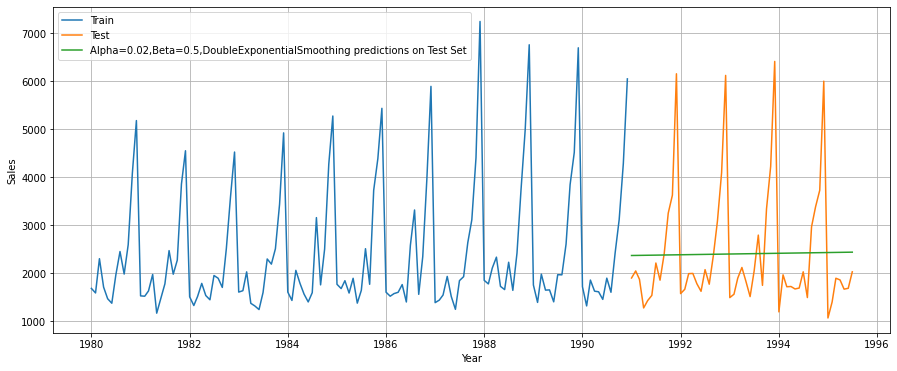

In [553]:
print('Figure No. 24')
plt.plot(DES_train_spark['Sparkling'], label='Train')
plt.plot(DES_test_spark['Sparkling'], label='Test')
plt.plot(DES_test_spark['predict', 0.02, 0.5], label='Alpha=0.02,Beta=0.5,DoubleExponentialSmoothing predictions on Test Set')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend(loc='best')
plt.grid();

### Double Exponential Smoothening - Rose Wine

In [555]:
DES_train_rose = train_rose.copy()
DES_test_rose = test_rose.copy()

In [556]:
model_DES_rose = Holt(DES_train_rose['Rose'])
model_DES_rose.fit(optimized=True)
model_DES_rose.params

{'smoothing_level': 5.271626142148799e-08,
 'smoothing_trend': 2.581003547020515e-09,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 137.81551886562906,
 'initial_trend': -0.49437754270808776,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [558]:
RMSE_rose_des = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Test RMSE': []})
for i in np.arange(0,1.1,0.01):
    for j in np.arange(0.,1.1,0.01):
        model_DES_alpha_i_j = model_DES_rose.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_train_rose['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test_rose['predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(DES_test_rose))
        rmse_model6_test = metrics.mean_squared_error(DES_test_rose['Rose'],DES_test_rose['predict',i,j],squared=False)
        RMSE_rose_des = RMSE_rose_des.append({'Alpha Values':i,'Beta Values':j,'Test RMSE':rmse_model6_test}, ignore_index=True)

In [559]:
RMSE_rose_des.sort_values(by='Test RMSE', ascending=True).head(10)

Alpha Values  Beta Values  Test RMSE
487          0.04         0.47  14.560058
355          0.03         0.25  14.683478
395          0.03         0.65  14.714918
444          0.04         0.04  14.895847
486          0.04         0.46  14.907935
259          0.02         0.39  14.975546
553          0.05         0.03  15.574880
354          0.03         0.24  15.690196
584          0.05         0.34  15.937467
583          0.05         0.33  15.996678

In [266]:
resultsDES2 = pd.DataFrame({'RMSE': [RMSE_rose_des.sort_values(by='Test RMSE', ascending=True).values[0][2]]},index=['Alpha=0.04,Beta=0.47,DoubleExponentialSmoothing'])

#resultsDf_rose = pd.concat([resultsDf_rose, resultsDES2])
resultsDf_rose

RMSE
RegressionOnTime                        15.268955
NaiveModel                              79.718773
SimpleAverage                           53.460570
2pointTrailingMovingAverage             11.529278
4pointTrailingMovingAverage             14.451403
6pointTrailingMovingAverage             14.566327
9pointTrailingMovingAverage             14.727630
Alpha=0.098,SimpleExponentialSmoothing  36.796242
Alpha=0.99,SimpleExponentialSmoothing   79.498734

### Triple Exponential Smoothing (Holt - Winter's Model) - Sparkling Wine

In [267]:
TES_train_spark = train_spark.copy()
TES_test_spark = test_spark.copy()

In [268]:
model_TES_spark = ExponentialSmoothing(TES_train_spark['Sparkling'],trend='multiplicative',seasonal='multiplicative')
model_TES_autofit = model_TES_spark.fit(optimized=True)

In [269]:
model_TES_autofit.params

{'smoothing_level': 0.11107187214370935,
 'smoothing_trend': 0.049365309549697874,
 'smoothing_seasonal': 0.3950794496653426,
 'damping_trend': nan,
 'initial_level': 1639.9995024185996,
 'initial_trend': 0.9981126525787252,
 'initial_seasons': array([1.06524631, 1.02630302, 1.40608633, 1.18860807, 0.97910472,
        0.9701166 , 1.28578426, 1.64224143, 1.3396781 , 1.74132097,
        2.69930532, 3.41147241]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [270]:
TES_test_spark['auto_predict'] = model_TES_autofit.forecast(steps=len(test_spark))
TES_test_spark.head()

Sparkling  auto_predict
YearMonth                          
1991-01-01       1902   1589.749629
1991-02-01       2049   1346.289832
1991-03-01       1874   1764.236935
1991-04-01       1279   1649.583801
1991-05-01       1432   1542.730162

Figure No. 25


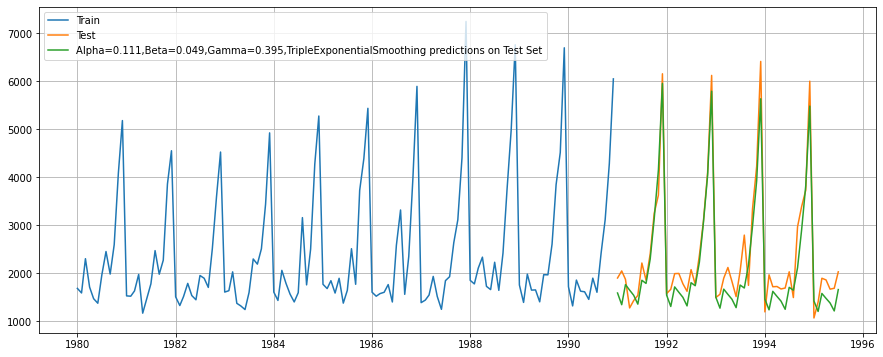

In [561]:
print('Figure No. 25')
plt.plot(TES_train_spark['Sparkling'], label='Train')
plt.plot(TES_test_spark['Sparkling'], label='Test')
plt.plot(TES_test_spark['auto_predict'], label='Alpha=0.111,Beta=0.049,Gamma=0.395,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [272]:

rmse_TES_test_1 = metrics.mean_squared_error(TES_test_spark['Sparkling'],TES_test_spark['auto_predict'],squared=False)
print("For Alpha=0.111,Beta=0.049,Gamma=0.395, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_TES_test_1))

For Alpha=0.111,Beta=0.049,Gamma=0.395, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 383.279


In [274]:
resultsTES1 = pd.DataFrame({'RMSE': [rmse_TES_test_1]}
                           ,index=['Alpha=0.111,Beta=0.049,Gamma=0.395,TripleExponentialSmoothing'])

resultsDf_spark = pd.concat([resultsDf_spark, resultsTES1])

RMSE
RegressionOnTime                                    1389.135175
NaiveModel                                          3864.279352
SimpleAverage                                       1275.081804
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.05,SimpleExponentialSmoothing               1316.034674
Alpha=0.02,SimpleExponentialSmoothing               1279.495201
Alpha=0.02,Beta=0.5,DoubleExponentialSmoothing      1274.630824
Alpha=0.111,Beta=0.049,Gamma=0.395,TripleExpone...   383.278793
Alpha=0.111,Beta=0.049,Gamma=0.395,TripleExpone...   383.278793

In [276]:
resultsDf_spark.drop_duplicates(inplace=True)

In [277]:
resultsDf_spark

RMSE
RegressionOnTime                                    1389.135175
NaiveModel                                          3864.279352
SimpleAverage                                       1275.081804
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.05,SimpleExponentialSmoothing               1316.034674
Alpha=0.02,SimpleExponentialSmoothing               1279.495201
Alpha=0.02,Beta=0.5,DoubleExponentialSmoothing      1274.630824
Alpha=0.111,Beta=0.049,Gamma=0.395,TripleExpone...   383.278793

### Triple Exponential Smoothing (Holt - Winter's Model) - Rose Wine

In [563]:
TES_train_rose = train_rose.copy()
TES_test_rose = test_rose.copy()

In [564]:
model_TES_rose = ExponentialSmoothing(TES_train_rose['Rose'],trend='additive',seasonal='additive')
model_TES_autofit_rose = model_TES_rose.fit(optimized=True)

In [565]:
model_TES_autofit_rose.params

{'smoothing_level': 0.08830650400877198,
 'smoothing_trend': 1.4249950386556942e-05,
 'smoothing_seasonal': 0.0012936628919929074,
 'damping_trend': nan,
 'initial_level': 77.00940243111742,
 'initial_trend': -0.5495163912017924,
 'initial_seasons': array([ 38.74254423,  51.06566184,  58.99213773,  48.26844651,
         56.9677035 ,  62.37910352,  72.39639152,  78.53210904,
         74.58571328,  72.78231661,  90.84375125, 133.19951499]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [566]:
TES_test_rose['auto_predict'] = model_TES_autofit_rose.forecast(steps=len(test_rose))
TES_test_rose.head()

Rose  auto_predict
YearMonth                     
1991-01-01  54.0     42.762122
1991-02-01  55.0     54.536833
1991-03-01  66.0     61.914792
1991-04-01  65.0     50.643305
1991-05-01  60.0     58.794134

Figure No. 26


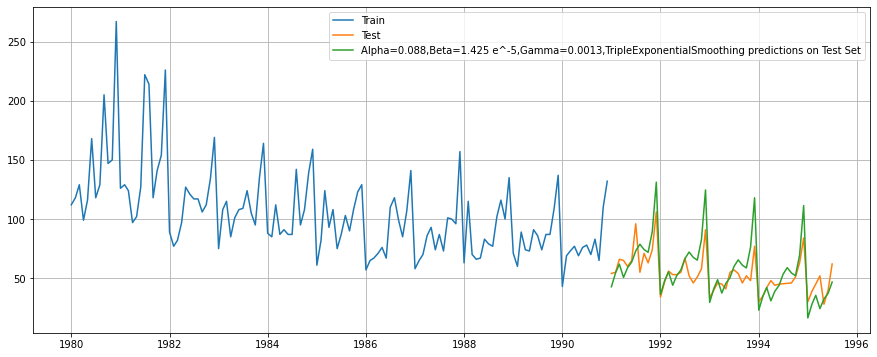

In [568]:
print('Figure No. 26')
plt.plot(TES_train_rose['Rose'], label='Train')
plt.plot(TES_test_rose['Rose'], label='Test')

plt.plot(TES_test_rose['auto_predict'], label='Alpha=0.088,Beta=1.425 e^-5,Gamma=0.0013,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [570]:
rmse_model2_test_1 = metrics.mean_squared_error(TES_test_rose['Rose'],TES_test_rose['auto_predict'],squared=False)
print("For Alpha=0.088,Beta=1.425 e^-5,Gamma=0.0013, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test_1))

For Alpha=0.088,Beta=1.425 e^-5,Gamma=0.0013, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 14.275


In [575]:
results = pd.DataFrame({'RMSE': [rmse_model2_test_1]}
                           ,index=['Alpha=0.088,Beta=1.425 e^-5,Gamma=0.0013, TripleRxponentialSmoothing'])

resultsDf_rose = pd.concat([resultsDf_rose, results])

In [579]:
resultsDf_rose.drop_duplicates(inplace=True)

In [581]:
resultsDf_rose.sort_values(by='RMSE')

RMSE
2pointTrailingMovingAverage                         11.529278
Alpha=0.088,Beta=1.425 e^-5,Gamma=0.0013, Tripl...  14.275203
4pointTrailingMovingAverage                         14.451403
6pointTrailingMovingAverage                         14.566327
9pointTrailingMovingAverage                         14.727630
RegressionOnTime                                    15.268955
AutoARIMA(3,1,3)                                    15.987645
AutoSARIMA(2,1,4)(4,0,4,6)                          26.110376
manualARIMA(4,1,2)                                  33.950141
Alpha=0.098,SimpleExponentialSmoothing              36.796242
SimpleAverage                                       53.460570
Alpha=0.99,SimpleExponentialSmoothing               79.498734
NaiveModel                                          79.718773

In [582]:
resultsDf_spark.sort_values(by='RMSE', ascending=True)

RMSE
Alpha=0.111,Beta=0.049,Gamma=0.395,TripleExpone...   383.278793
2pointTrailingMovingAverage                          813.400684
AutoSARIMA(2,1,3)(2,0,3,6)                           824.803600
4pointTrailingMovingAverage                         1156.589694
ManualSARIMA(3,1,2)(2,1,2,6)                        1241.167488
Alpha=0.02,Beta=0.5,DoubleExponentialSmoothing      1274.630824
SimpleAverage                                       1275.081804
Alpha=0.02,SimpleExponentialSmoothing               1279.495201
6pointTrailingMovingAverage                         1283.927428
Alpha=0.05,SimpleExponentialSmoothing               1316.034674
9pointTrailingMovingAverage                         1346.278315
AutoARIMA(2,1,1)                                    1375.191113
manualARIMA(3,1,2)                                  1378.786317
RegressionOnTime                                    1389.135175
NaiveModel                                          3864.279352

In [288]:
resultsDf_rose.sort_values(by='RMSE', ascending=True)

RMSE
2pointTrailingMovingAverage                         11.529278
Alpha=0.075,Beta=0.054,Gamma=0.41,TripleExponen...  14.275203
4pointTrailingMovingAverage                         14.451403
6pointTrailingMovingAverage                         14.566327
9pointTrailingMovingAverage                         14.727630
RegressionOnTime                                    15.268955
Alpha=0.098,SimpleExponentialSmoothing              36.796242
SimpleAverage                                       53.460570
Alpha=0.99,SimpleExponentialSmoothing               79.498734
NaiveModel                                          79.718773

For Sparling Wine- Triple exponential smoothing gives the lowest RMSE.
alpha = 0.111, beta= 0.049, gamma = 0.395

For Rose Wine - 2 point Trailing moving average model gives the lowest RMSE.

### Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment.
### Note: Stationarity should be checked at alpha = 0.05

In [653]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
     #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

An augmented Dickey–Fuller test (ADF) tests the null hypothesis that a unit root is present in a time series sample. The alternative hypothesis is different depending on which version of the test is used, but is usually stationarity or trend-stationarity.

HNull = Time series is non-stationary
HAlt = Time series is stationary

Alpha = 0.05 

Figure No. 38


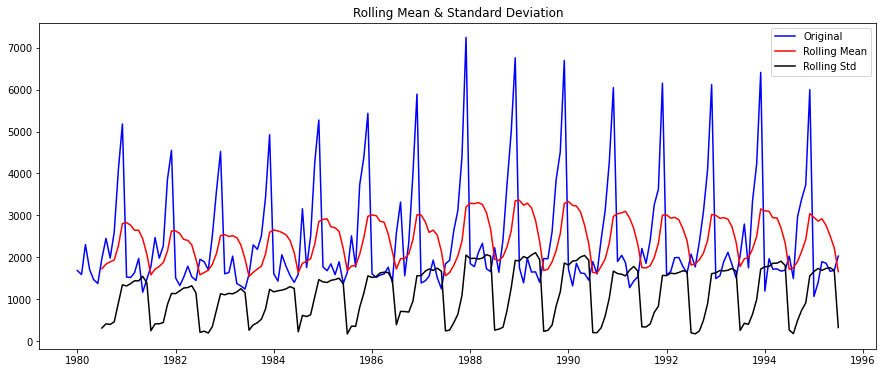

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [654]:
print('Figure No. 38')
test_stationarity(df_Spark)

Figure No. 39


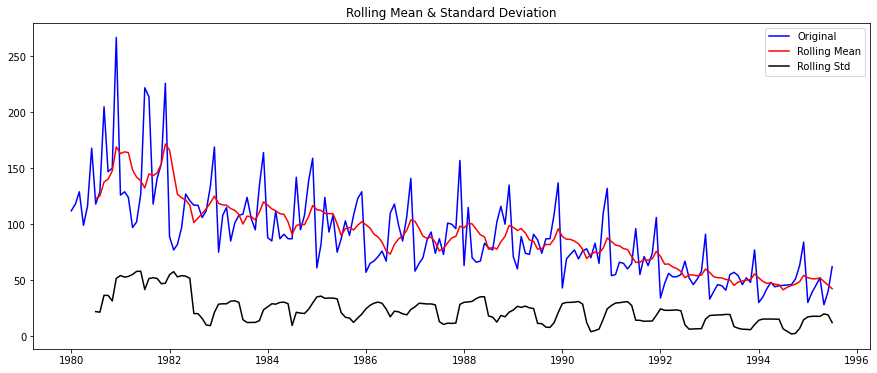

Results of Dickey-Fuller Test:
Test Statistic                  -1.876699
p-value                          0.343101
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [655]:
print('Figure No. 39')
test_stationarity(df_Rose)

The p-Value for both data set is greater than 0.05. This implies that at 95% confidence level we fail to reject the null hypothesis of ADFuller test and conclude that our time series data for both Sparkling and Rose Wine are infact non-stationary in nature. Alternatively, presence of trend and seasonality in both the data set hints us at the time series being non-stationary itself.

In order for us to build a forecasting model we have to make our time series data stationary. We can check the stationarity of our data set after taking first order differencing.

Figure No. 40


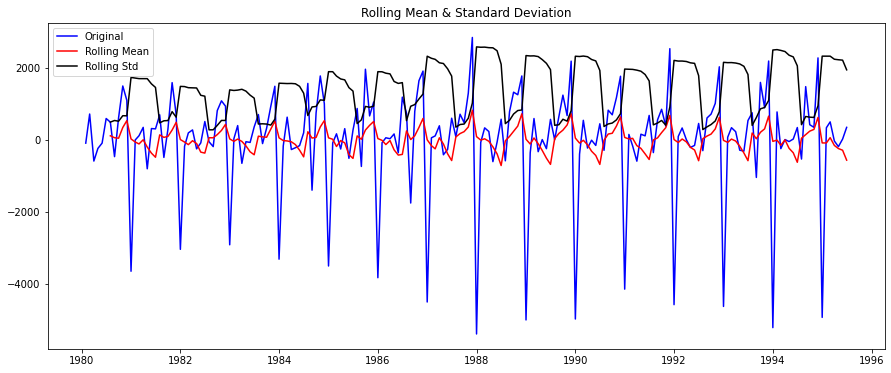

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [657]:
print('Figure No. 40')
test_stationarity(df_Spark['Sparkling'].diff().dropna())

Figure No. 41


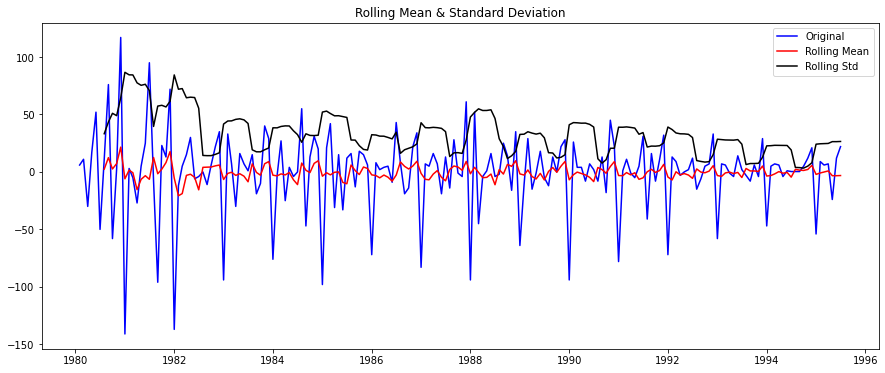

Results of Dickey-Fuller Test:
Test Statistic                -8.044392e+00
p-value                        1.810895e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [658]:
print('Figure No. 41')
test_stationarity(df_Rose['Rose'].diff().dropna())

We can see that after performing first order differencing, the p-Value for both the data set have reduced significantly below alpha value 0.05. Hence, we reject the null hypothesis for this instance and conclude that we have a stationary time series data at first order differencing.

### Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

The first step of building an ARIMA model is to determine p,d,q  where: p is the number of autoregressive (AR) terms, d is the number of nonseasonal differences needed for stationarity, and q is the number of lagged forecast errors in the prediction equation (MA). We can find the optimum value of p and q terms from PACF and ACF plots respectively.

For automated version we will iterate through different combination of p, d, q values and check which combination gives the lowest AIC on the training data.

Figure No. 42


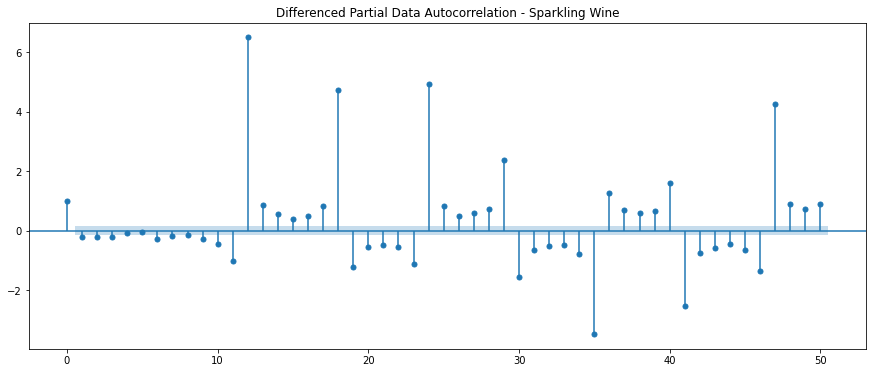

In [661]:
plt.rcParams['figure.figsize'] = 15, 6
print('Figure No. 42')
plot_pacf(df_Spark['Sparkling'].diff().dropna(),lags=50,title='Differenced Partial Data Autocorrelation - Sparkling Wine')
plt.show()

Figure No. 44


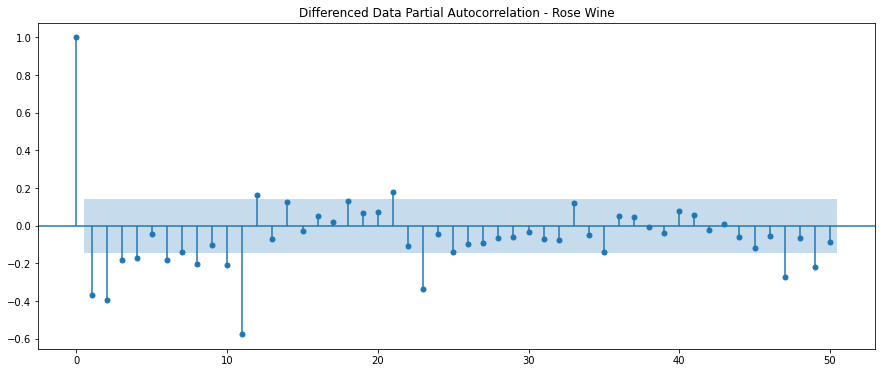

In [663]:
print('Figure No. 44')
plot_pacf(df_Rose['Rose'].diff().dropna(), lags=50, title='Differenced Data Partial Autocorrelation - Rose Wine');

Figure No. 43


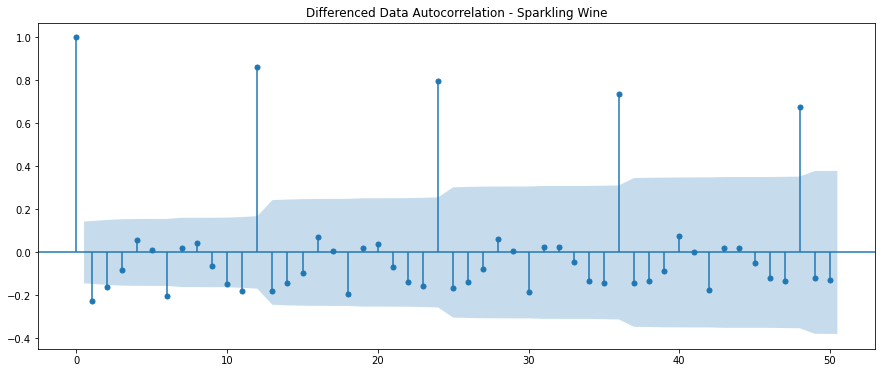

In [662]:
print('Figure No. 43')
plot_acf(df_Spark['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation - Sparkling Wine');

Figure No. 45


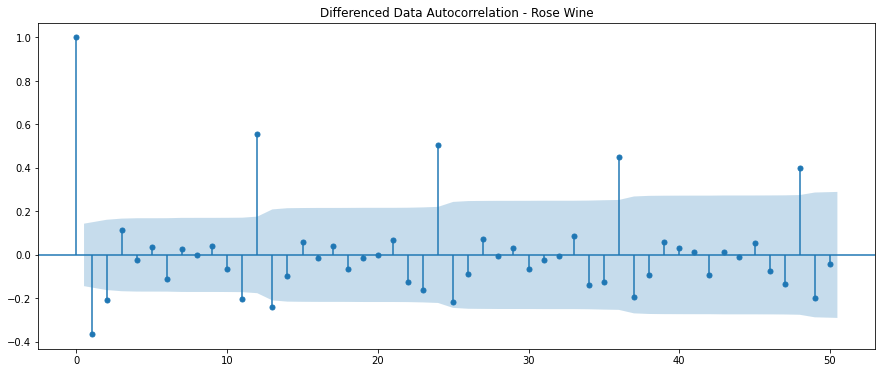

In [664]:
print('Figure No. 45')
plot_acf(df_Rose['Rose'].diff().dropna(), lags=50, title='Differenced Data Autocorrelation - Rose Wine');

In [298]:
import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [299]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [300]:
for param in pdq:
    ARIMA_model = ARIMA(train_spark['Sparkling'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:2269.582796371201
ARIMA(0, 1, 1) - AIC:2264.9064376843794
ARIMA(0, 1, 2) - AIC:2232.783097684644
ARIMA(0, 1, 3) - AIC:2233.0166051370875
ARIMA(1, 1, 0) - AIC:2268.5280607731743
ARIMA(1, 1, 1) - AIC:2235.0139453498286
ARIMA(1, 1, 2) - AIC:2233.5976471192453
ARIMA(1, 1, 3) - AIC:2234.574141545919
ARIMA(2, 1, 0) - AIC:2262.035600271052
ARIMA(2, 1, 1) - AIC:2232.36048988372
ARIMA(2, 1, 2) - AIC:2210.616568616669
ARIMA(2, 1, 3) - AIC:2227.558862178783
ARIMA(3, 1, 0) - AIC:2259.471554713157
ARIMA(3, 1, 1) - AIC:2233.9217618183993
ARIMA(3, 1, 2) - AIC:2228.9271407128754
ARIMA(3, 1, 3) - AIC:2225.6615585255827


In [301]:
ARIMA_AIC.sort_values(by='AIC').head()

param          AIC
10  (2, 1, 2)  2210.616569
15  (3, 1, 3)  2225.661559
11  (2, 1, 3)  2227.558862
14  (3, 1, 2)  2228.927141
9   (2, 1, 1)  2232.360490

In [302]:
auto_ARIMA = ARIMA(train_spark['Sparkling'], order=(2,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1099.308
Method:                       css-mle   S.D. of innovations           1011.622
Date:                Thu, 19 May 2022   AIC                           2210.617
Time:                        17:17:57   BIC                           2227.868
Sample:                    02-01-1980   HQIC                          2217.626
                         - 12-01-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.5854      0.516     10.819      0.000       4.574       6.597
ar.L1.D.Sparkling     1.2704      0.074     17.053      0.000       1.124       1.416
ar.L2.D.Sparkling    -0.

In [303]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test_spark))

In [304]:
rmse = metrics.mean_squared_error(test_spark['Sparkling'],predicted_auto_ARIMA[0],squared=False)
print(rmse)

1375.1911127976161


In [305]:
arima_res = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['AutoARIMA(2,1,1)'])

In [306]:
arima_res

RMSE
AutoARIMA(2,1,1)  1375.191113

In [307]:
import itertools
p = q = range(0, 5)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (0, 1, 4)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (1, 1, 4)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (2, 1, 4)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)
Model: (3, 1, 4)
Model: (4, 1, 0)
Model: (4, 1, 1)
Model: (4, 1, 2)
Model: (4, 1, 3)
Model: (4, 1, 4)


In [308]:
ARIMA_AIC_ROSE = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC_ROSE

Empty DataFrame
Columns: [param, AIC]
Index: []

In [309]:
for param in pdq:
    ARIMA_model = ARIMA(train_rose['Rose'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC_ROSE = ARIMA_AIC_ROSE.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:1335.1526583086775
ARIMA(0, 1, 1) - AIC:1280.7261830464226
ARIMA(0, 1, 2) - AIC:1276.8353736830445
ARIMA(0, 1, 3) - AIC:1278.0742530971538
ARIMA(0, 1, 4) - AIC:1278.8383574826853
ARIMA(1, 1, 0) - AIC:1319.3483105806022
ARIMA(1, 1, 1) - AIC:1277.7757578817404
ARIMA(1, 1, 2) - AIC:1277.3592239194302
ARIMA(1, 1, 3) - AIC:1279.312632641043
ARIMA(1, 1, 4) - AIC:1281.8925250271393
ARIMA(2, 1, 0) - AIC:1300.609261174395
ARIMA(2, 1, 1) - AIC:1279.0456894093122
ARIMA(2, 1, 2) - AIC:1279.298693936552
ARIMA(2, 1, 3) - AIC:1281.1962260432724
ARIMA(2, 1, 4) - AIC:1282.416805887889
ARIMA(3, 1, 0) - AIC:1299.4787391545829
ARIMA(3, 1, 1) - AIC:1279.6059687267525
ARIMA(3, 1, 2) - AIC:1280.9692517885164
ARIMA(3, 1, 3) - AIC:1273.1941044805194
ARIMA(3, 1, 4) - AIC:1274.3351439024052
ARIMA(4, 1, 0) - AIC:1298.3195533735275
ARIMA(4, 1, 1) - AIC:1281.1163245052824
ARIMA(4, 1, 2) - AIC:1283.7527278628559
ARIMA(4, 1, 3) - AIC:1284.9526869787996
ARIMA(4, 1, 4) - AIC:1284.772157998907


In [310]:
ARIMA_AIC_ROSE.sort_values(by='AIC').head()

param          AIC
18  (3, 1, 3)  1273.194104
19  (3, 1, 4)  1274.335144
2   (0, 1, 2)  1276.835374
7   (1, 1, 2)  1277.359224
6   (1, 1, 1)  1277.775758

In [311]:
auto_ARIMA_Rose = ARIMA(train_rose['Rose'], order=(3,1,3))

results_auto_ARIMA_Rose = auto_ARIMA_Rose.fit()

print(results_auto_ARIMA_Rose.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(3, 1, 3)   Log Likelihood                -628.597
Method:                       css-mle   S.D. of innovations             28.356
Date:                Thu, 19 May 2022   AIC                           1273.194
Time:                        17:18:45   BIC                           1296.196
Sample:                    02-01-1980   HQIC                          1282.541
                         - 12-01-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4906      0.088     -5.547      0.000      -0.664      -0.317
ar.L1.D.Rose    -0.7242      0.086     -8.401      0.000      -0.893      -0.555
ar.L2.D.Rose    -0.7217      0.087     -8.33

In [312]:
predicted_auto_ARIMA_rose = results_auto_ARIMA_Rose.forecast(steps=len(test_rose))
rmse = metrics.mean_squared_error(test_rose['Rose'],predicted_auto_ARIMA_rose[0],squared=False)
print(rmse)

15.987644861166109


In [313]:
arima_res_rose = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['AutoARIMA(3,1,3)'])

In [314]:
arima_res_rose

RMSE
AutoARIMA(3,1,3)  15.987645

### Auto SARIMA MODEL - Sparkling

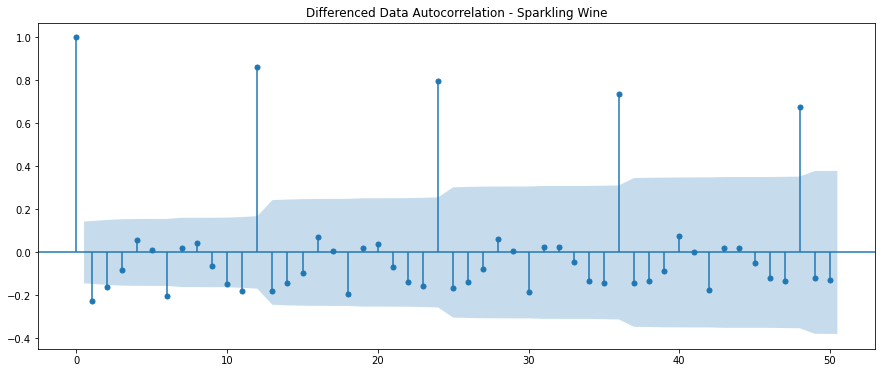

In [315]:
plot_acf(df_Spark['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation - Sparkling Wine');

from ACF plot for Sparkling Wine Sales data we can observe a seasonal pattern repeating at an interval 6 as well as 12. So, we arrive at a conclusion that our Auto SARIMA model can be run at seasonality 6 or 12.  

In [316]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (0, 1, 3)(0, 0, 3, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (1, 1, 3)(1, 0, 3, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)
Model: (2, 1, 3)(2, 0, 3, 6)
Model: (3, 1, 0)(3, 0, 0, 6)
Model: (3, 1, 1)(3, 0, 1, 6)
Model: (3, 1, 2)(3, 0, 2, 6)
Model: (3, 1, 3)(3, 0, 3, 6)


In [317]:
SARIMA_AIC_Spark = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC_Spark

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [318]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train_spark['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC_Spark = SARIMA_AIC_Spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:2152.3780761716284
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1955.6355536889432
SARIMA(0, 1, 0)x(0, 0, 3, 6) - AIC:1863.7845154973293
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:2164.4097581959904
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:2079.559984442793
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1926.9360111369451
SARIMA(0, 1, 0)x(1, 0, 3, 6) - AIC:1803.392909507725
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1839.4012986872267
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1841.1993617510577
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1810.9177805655947
SARIMA(0, 1, 0)x(2, 0, 3, 6) - AIC:1725.537642554945
SARIMA(0, 1, 0)x(3, 0, 0, 6) - AIC:1748.762266815527
SARIMA(0, 1, 0)x(3, 0, 1, 6) - AIC:1750.6879953816385
SARIMA(0, 1, 0)x(3, 0, 2, 6) - AIC:1739.4489858032248
SARIMA(0, 1, 0)x(3, 0, 3, 6) - AIC:1725.0138758902322
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:2230.162907850583
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:2130.565285908282
SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC

In [666]:
SARIMA_AIC_Spark.sort_values(by='AIC').head()

param      seasonal          AIC
187  (2, 1, 3)  (2, 0, 3, 6)  1629.052644
59   (0, 1, 3)  (2, 0, 3, 6)  1633.327862
123  (1, 1, 3)  (2, 0, 3, 6)  1633.983078
251  (3, 1, 3)  (2, 0, 3, 6)  1634.474647
63   (0, 1, 3)  (3, 0, 3, 6)  1635.054398

In [667]:
AUTO_SARIMA_model_Spark = sm.tsa.statespace.SARIMAX(train_spark['Sparkling'].values,
                                            order=(2,1,3),
                                            seasonal_order=(2,0,3,6),
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
results_auto_SARIMA_spark = AUTO_SARIMA_model_Spark.fit(maxiter=1000)
print(results_auto_SARIMA_spark.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(2, 1, 3)x(2, 0, 3, 6)   Log Likelihood                -803.526
Date:                           Fri, 20 May 2022   AIC                           1629.053
Time:                                   22:47:23   BIC                           1658.657
Sample:                                        0   HQIC                          1641.058
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7437      0.090    -19.428      0.000      -1.920      -1.568
ar.L2         -0.7862      0.087     -9.072

Figure No. 46


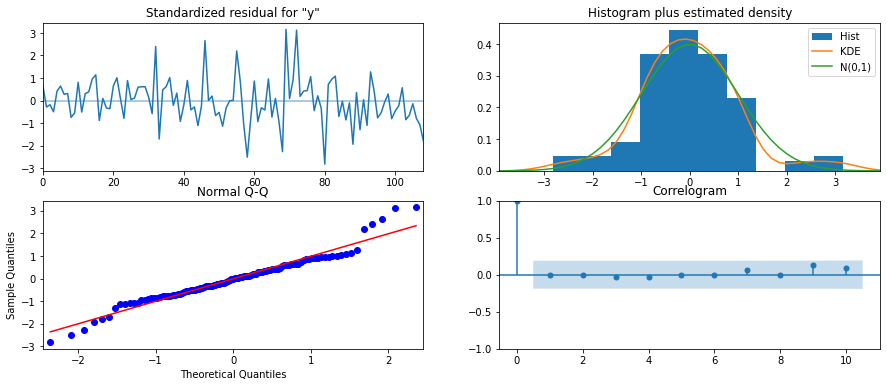

In [665]:
print('Figure No. 46')
results_auto_SARIMA_spark.plot_diagnostics();

In [322]:
predicted_auto_SARIMA_spark = results_auto_SARIMA_spark.get_forecast(steps=len(test_spark))
predicted_auto_SARIMA_spark.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1344.878101  366.772331     626.017542    2063.738660
1   990.130264  385.153254     235.243757    1745.016771
2  1648.810614  385.404060     893.432537    2404.188691
3  1571.712887  396.074718     795.420704    2348.005069
4  1169.779990  396.232184     393.179181    1946.380800

In [323]:
rmse = metrics.mean_squared_error(test_spark['Sparkling'],predicted_auto_SARIMA_spark.predicted_mean,squared=False)
print(rmse)

824.8035999478077


In [324]:
temp1 = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['AutoSARIMA(2,1,3)(2,0,3,6)'])


arima_res = pd.concat([arima_res,temp1])
arima_res

RMSE
AutoARIMA(2,1,1)            1375.191113
AutoSARIMA(2,1,3)(2,0,3,6)   824.803600

### Auto SARIMA MODEL - Rose

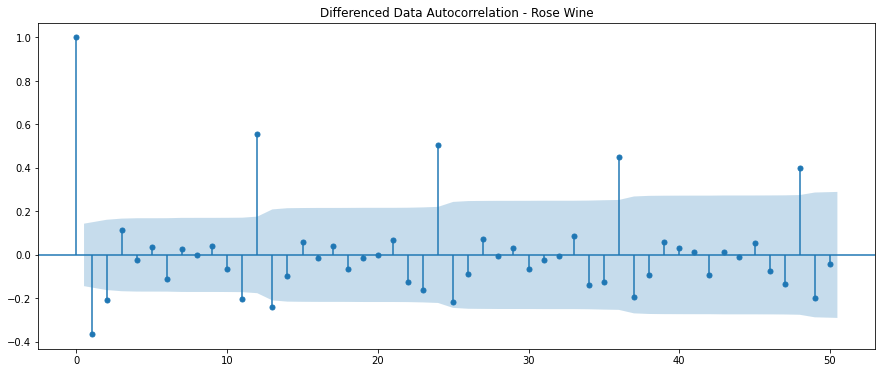

In [325]:
plot_acf(df_Rose['Rose'].diff().dropna(), lags=50,title='Differenced Data Autocorrelation - Rose Wine');

from ACF plot for Rose Wine Sales data we can observe a seasonal pattern repeating at an interval 6 as well as 12. So, we arrive at a conclusion that our Auto SARIMA model can be run at seasonality 6 or 12.

In [668]:
import itertools
p = q = range(0, 5)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (0, 1, 3)(0, 0, 3, 6)
Model: (0, 1, 4)(0, 0, 4, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (1, 1, 3)(1, 0, 3, 6)
Model: (1, 1, 4)(1, 0, 4, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)
Model: (2, 1, 3)(2, 0, 3, 6)
Model: (2, 1, 4)(2, 0, 4, 6)
Model: (3, 1, 0)(3, 0, 0, 6)
Model: (3, 1, 1)(3, 0, 1, 6)
Model: (3, 1, 2)(3, 0, 2, 6)
Model: (3, 1, 3)(3, 0, 3, 6)
Model: (3, 1, 4)(3, 0, 4, 6)
Model: (4, 1, 0)(4, 0, 0, 6)
Model: (4, 1, 1)(4, 0, 1, 6)
Model: (4, 1, 2)(4, 0, 2, 6)
Model: (4, 1, 3)(4, 0, 3, 6)
Model: (4, 1, 4)(4, 0, 4, 6)


In [327]:
SARIMA_AIC_Rose = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC_Rose

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [328]:
for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model_rose = sm.tsa.statespace.SARIMAX(train_rose['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA_Rose = SARIMA_model_rose.fit(maxiter=2000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA_Rose.aic))
        SARIMA_AIC_Rose = SARIMA_AIC_Rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_Rose.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:1264.4996261113852
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1144.7077471827465
SARIMA(0, 1, 0)x(0, 0, 3, 6) - AIC:1081.2713830625203
SARIMA(0, 1, 0)x(0, 0, 4, 6) - AIC:977.1491518511975
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:1274.7897737087985
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:1241.7870945149107
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1146.3093266722499
SARIMA(0, 1, 0)x(1, 0, 3, 6) - AIC:1058.9861743124366
SARIMA(0, 1, 0)x(1, 0, 4, 6) - AIC:978.5946722922803
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1137.9167236212038
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1137.4533629515
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1117.0224426239624
SARIMA(0, 1, 0)x(2, 0, 3, 6) - AIC:1058.8048206424005
SARIMA(0, 1, 0)x(2, 0, 4, 6) - AIC:970.5079607535021
SARIMA(0, 1, 0)x(3, 0, 0, 6) - AIC:1072.546583469527
SARIMA(0, 1, 0)x(3, 0, 1, 6) - AIC:1061.3687765139987
SARIMA(0, 1, 0)x(3, 0, 2, 6) - AIC:1058.0425051369236
SARIMA(0, 1, 0)x(3, 0, 3, 6) - AIC:

In [329]:
SARIMA_AIC_Rose.sort_values(by='AIC').head()

param      seasonal         AIC
374  (2, 1, 4)  (4, 0, 4, 6)  870.133935
499  (3, 1, 4)  (4, 0, 4, 6)  872.394829
124  (0, 1, 4)  (4, 0, 4, 6)  873.187611
624  (4, 1, 4)  (4, 0, 4, 6)  874.074590
249  (1, 1, 4)  (4, 0, 4, 6)  877.445619

In [330]:
AUTO_SARIMA_model_Rose = sm.tsa.statespace.SARIMAX(train_rose['Rose'].values,
                                            order=(2,1,4),
                                            seasonal_order=(4,0,4,6),
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
results_auto_SARIMA_rose = AUTO_SARIMA_model_Rose.fit(maxiter=1000)
print(results_auto_SARIMA_rose.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(2, 1, 4)x(4, 0, 4, 6)   Log Likelihood                -420.067
Date:                           Thu, 19 May 2022   AIC                            870.134
Time:                                   17:45:31   BIC                            909.509
Sample:                                        0   HQIC                           886.078
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1774      0.108      1.645      0.100      -0.034       0.389
ar.L2         -0.8416      0.089     -9.495

Figure No. 47


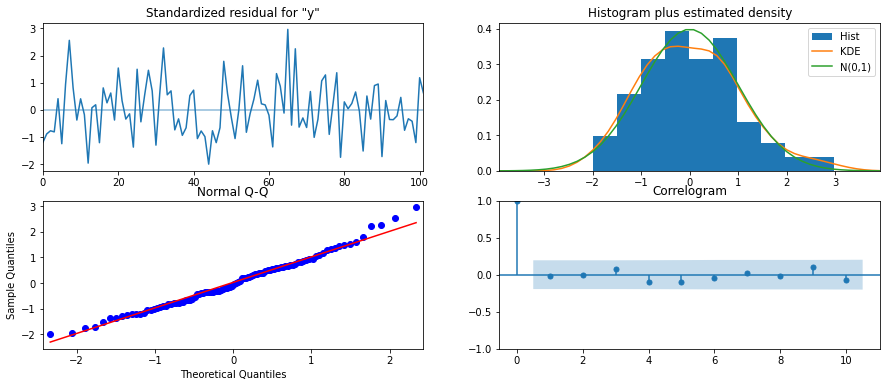

In [670]:
print('Figure No. 47')
results_auto_SARIMA_rose.plot_diagnostics();

In [332]:
predicted_auto_SARIMA_rose = results_auto_SARIMA_rose.get_forecast(steps=len(test_rose))
predicted_auto_SARIMA_rose.summary_frame(alpha=0.05).head()

y       mean    mean_se  mean_ci_lower  mean_ci_upper
0  67.941769  13.948992      40.602246      95.281291
1  66.427204  14.130592      38.731752      94.122656
2  67.883552  14.327998      39.801193      95.965911
3  73.690185  14.386700      45.492770     101.887599
4  80.439865  14.520171      51.980853     108.898877

In [333]:
rmse = metrics.mean_squared_error(test_rose['Rose'],predicted_auto_SARIMA_rose.predicted_mean,squared=False)
print(rmse)

26.11037583130622


In [334]:
temp2 = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['AutoSARIMA(2,1,4)(4,0,4,6)'])


arima_res_rose = pd.concat([arima_res_rose,temp2])
arima_res_rose.drop_duplicates(inplace=True)
arima_res_rose

RMSE
AutoARIMA(3,1,3)            15.987645
AutoSARIMA(2,1,4)(4,0,4,6)  26.110376

We have chosen the optimum values for p,d,q for both the ARIMA model using iteration that gives us the lowest AIC.
1. for Auto ARIMA - Sparkling Wine, the optimum values of p,d,q are found to be 2,1,2
2. RMSE for Auto ARIMA - Sparkling Wine is 1375.19
3. for Auto ARIMA - Rose Wine, the optimum values for p,d,q are found to be 3,1,3
4. RMSE for Auto ARIMA - Rose Wine is 15.98
5. Auto SARIMA - Sparkling Wine model has optimum values for parameter p,d,q as 2,1,2 and P,D,Q as 2,0,3 and seasonal value as 6
6. RMSE for Auto SARIMA - Sparkling Wine model is 798.71
7. Auto SARIMA - Rose Wine model has optimum values for parameter p,d,q as 2,1,4 and P,D,Q as 4,0,4 and seasonality value as 6
8. RMSE for Auto SARIMA - Rose Wine model is 26.11

### Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

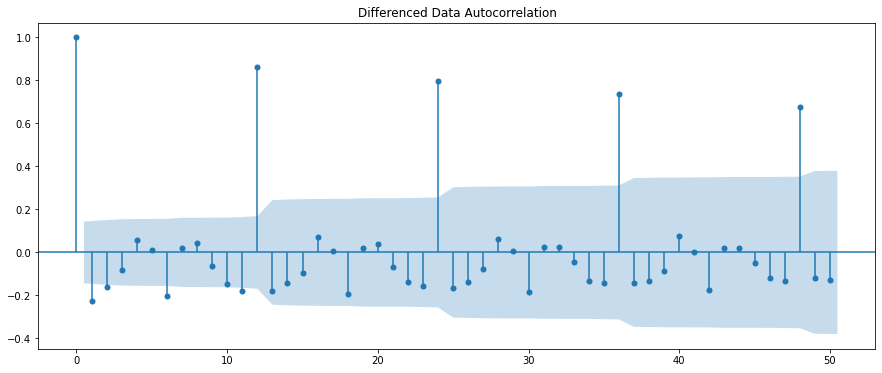

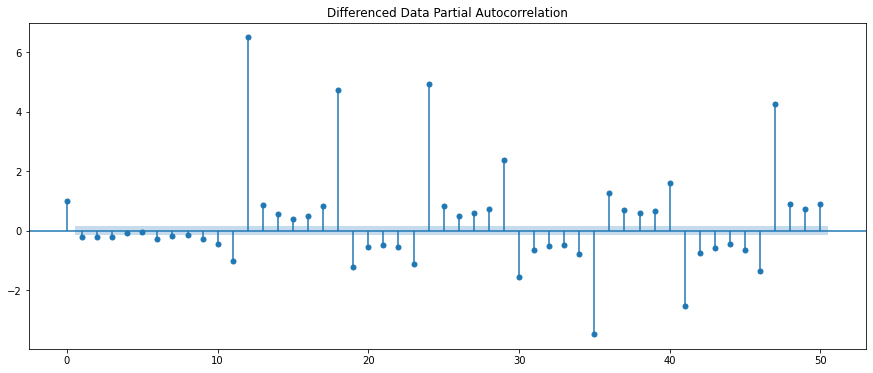

In [335]:
plot_acf(df_Spark['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df_Spark['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

Here, we have taken alpha=0.05.

1. The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off to 0.
2. The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off to 0
3. We will take the value of 'd' as 1 since we performed first order diffencing to make the time series stationary. (p,d,q) for Sparkling Wine model are (3,1,2) from the PACF and ACF plots.

In [336]:
manual_ARIMA_spark = ARIMA(train_spark['Sparkling'].astype('float64'), order=(3,1,2))

results_manual_ARIMA_spark = manual_ARIMA_spark.fit()

print(results_manual_ARIMA_spark.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -1107.464
Method:                       css-mle   S.D. of innovations           1105.999
Date:                Thu, 19 May 2022   AIC                           2228.927
Time:                        17:45:57   BIC                           2249.054
Sample:                    02-01-1980   HQIC                          2237.105
                         - 12-01-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.9812        nan        nan        nan         nan         nan
ar.L1.D.Sparkling    -0.4419        nan        nan        nan         nan         nan
ar.L2.D.Sparkling     0.

In [337]:
predicted_manual_ARIMA_spark = results_manual_ARIMA_spark.forecast(steps=len(test_spark))

In [338]:
rmse = metrics.mean_squared_error(test_spark['Sparkling'],predicted_manual_ARIMA_spark[0],squared=False)
print(rmse)

1378.7863165247775


In [339]:
temp3 = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['manualARIMA(3,1,2)'])


arima_res = pd.concat([arima_res,temp3])
arima_res.drop_duplicates(inplace=True)

In [340]:
arima_res

RMSE
AutoARIMA(2,1,1)            1375.191113
AutoSARIMA(2,1,3)(2,0,3,6)   824.803600
manualARIMA(3,1,2)          1378.786317

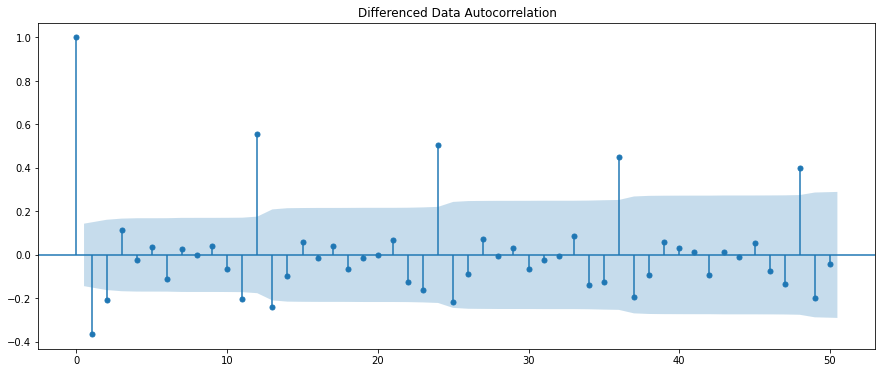

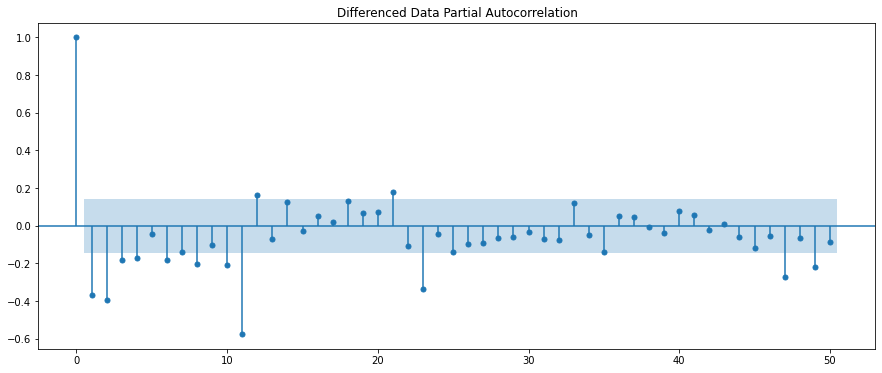

In [341]:
plt.rcParams['figure.figsize'] = 15,6
plot_acf(df_Rose['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df_Rose['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

(p,d,q) for Rose Wine model are (4,1,2) from the PACF and ACF plots.

In [342]:
manual_ARIMA_rose = ARIMA(train_rose['Rose'].astype('float64'), order=(4,1,2))

results_manual_ARIMA_rose = manual_ARIMA_rose.fit()

print(results_manual_ARIMA_rose.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(4, 1, 2)   Log Likelihood                -633.876
Method:                       css-mle   S.D. of innovations             29.793
Date:                Thu, 19 May 2022   AIC                           1283.753
Time:                        17:46:22   BIC                           1306.754
Sample:                    02-01-1980   HQIC                          1293.099
                         - 12-01-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.1905      0.576     -0.331      0.741      -1.319       0.938
ar.L1.D.Rose     1.1685      0.087     13.391      0.000       0.997       1.340
ar.L2.D.Rose    -0.3562      0.132     -2.69

In [343]:
predicted_manual_ARIMA_rose = results_manual_ARIMA_rose.forecast(steps=len(test_rose))

In [344]:
rmse = metrics.mean_squared_error(test_rose['Rose'],predicted_manual_ARIMA_rose[0],squared=False)
print(rmse)

33.950140751110546


In [345]:
temp4 = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['manualARIMA(4,1,2)'])


arima_res_rose = pd.concat([arima_res_rose,temp4])

In [346]:
arima_res_rose

RMSE
AutoARIMA(3,1,3)            15.987645
AutoSARIMA(2,1,4)(4,0,4,6)  26.110376
manualARIMA(4,1,2)          33.950141

### Manual SARIMA

Figure No. 48


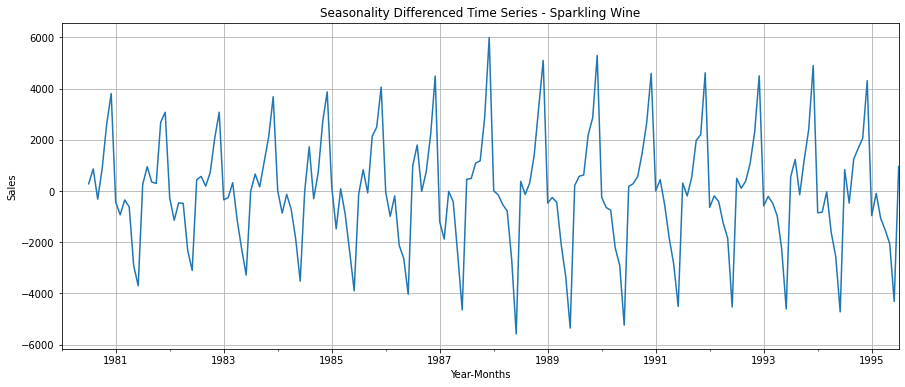

In [677]:
print('Figure No. 48')
(df_Spark['Sparkling'].diff(6)).plot()
plt.xlabel('Year-Months')
plt.ylabel('Sales')
plt.title('Seasonality Differenced Time Series - Sparkling Wine')
plt.grid();

Figure No. 49


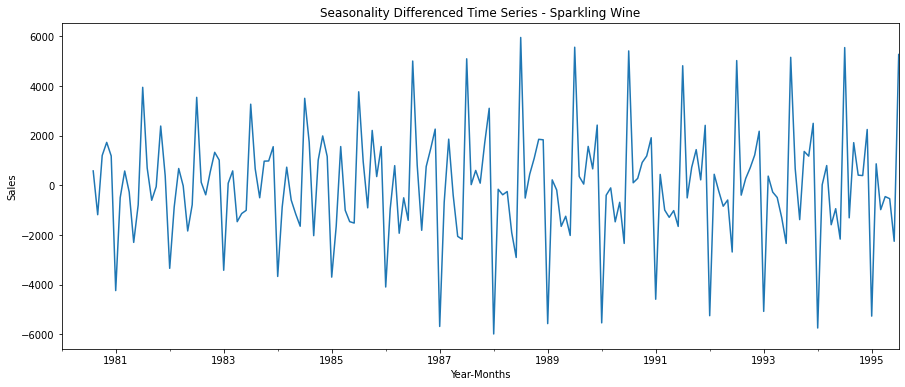

In [678]:
print('Figure No. 49')
(df_Spark['Sparkling'].diff(6).diff()).plot()
plt.xlabel('Year-Months')
plt.ylabel('Sales')
plt.title('Seasonality Differenced Time Series - Sparkling Wine')
plt.grid();

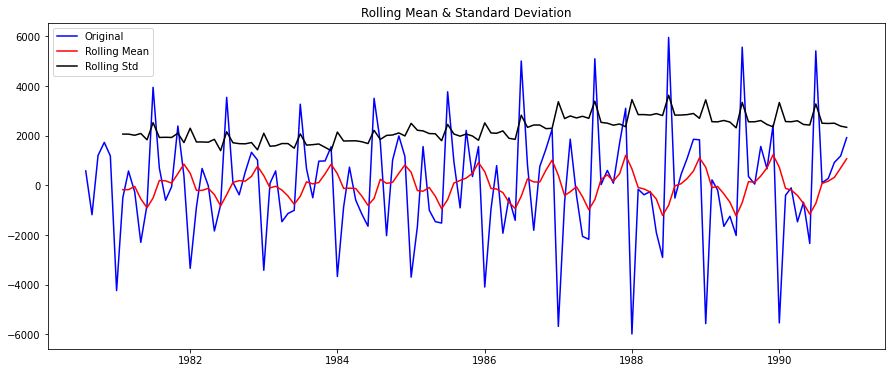

Results of Dickey-Fuller Test:
Test Statistic                -7.017242e+00
p-value                        6.683657e-10
#Lags Used                     1.300000e+01
Number of Observations Used    1.110000e+02
Critical Value (1%)           -3.490683e+00
Critical Value (5%)           -2.887952e+00
Critical Value (10%)          -2.580857e+00
dtype: float64 



In [349]:
test_stationarity((train_spark['Sparkling'].diff(6).dropna()).diff(1).dropna())

Figure No. 50


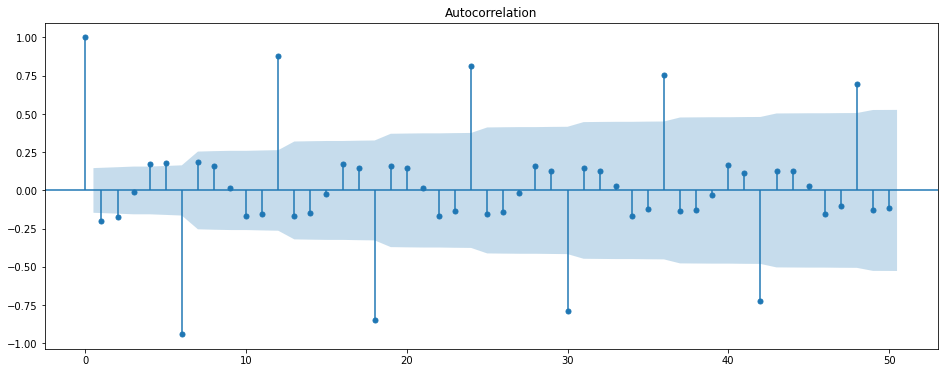

In [683]:
plt.rcParams['figure.figsize']= 16,6
print('Figure No. 50')
plot_acf((df_Spark['Sparkling'].diff(6).dropna()).diff(1).dropna(),lags=50);

Figure No. 51


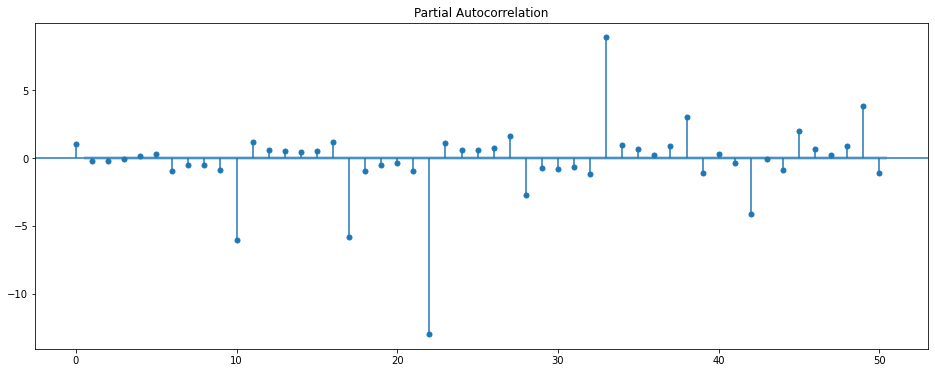

In [684]:
print('Figure No. 51')
plot_pacf((df_Spark['Sparkling'].diff(6).dropna()).diff(1).dropna(),lags=50);

In [352]:
manual_SARIMA_Spark = sm.tsa.statespace.SARIMAX(train_spark['Sparkling'].values,
                                order=(3, 1, 2),
                                seasonal_order=(2, 1, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_spark = manual_SARIMA_Spark.fit(maxiter=1000)
print(results_manual_SARIMA_spark.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(3, 1, 2)x(2, 1, 2, 6)   Log Likelihood                -819.789
Date:                           Thu, 19 May 2022   AIC                           1659.578
Time:                                   17:46:50   BIC                           1686.583
Sample:                                        0   HQIC                          1670.531
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2720      0.407     -0.668      0.504      -1.070       0.526
ar.L2         -0.3382      0.249     -1.357

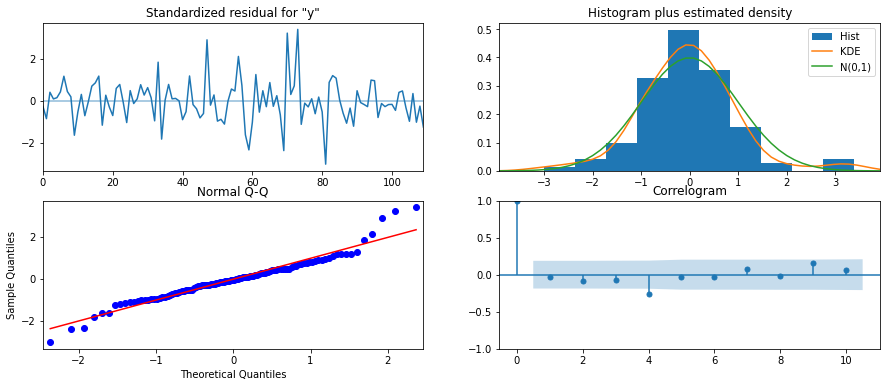

In [353]:
plt.rcParams['figure.figsize'] = 15,6
results_manual_SARIMA_spark.plot_diagnostics()
plt.show()

In [354]:
predicted_manual_SARIMA_spark = results_manual_SARIMA_spark.get_forecast(steps=len(test_spark))

In [355]:
predicted_manual_SARIMA_spark.summary_frame().head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1205.543372  414.255315     393.617875    2017.468869
1   838.199131  440.346080     -24.863326    1701.261588
2  1397.702229  447.834144     519.963435    2275.441023
3  1190.217586  471.097512     266.883430    2113.551742
4   955.863694  504.059214     -32.074211    1943.801600

In [356]:
rmse = metrics.mean_squared_error(test_spark['Sparkling'],predicted_manual_SARIMA_spark.predicted_mean,squared=False)
print(rmse)

1241.167488458122


In [357]:
temp5 = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ManualSARIMA(3,1,2)(2,1,2,6)'])


arima_res = pd.concat([arima_res,temp5])

In [360]:
arima_res

RMSE
AutoARIMA(2,1,1)              1375.191113
AutoSARIMA(2,1,3)(2,0,3,6)     824.803600
manualARIMA(3,1,2)            1378.786317
ManualSARIMA(3,1,2)(2,1,2,6)  1241.167488

In [361]:
resultsDf_spark = pd.concat([resultsDf_spark, arima_res])
resultsDf_spark

RMSE
RegressionOnTime                                    1389.135175
NaiveModel                                          3864.279352
SimpleAverage                                       1275.081804
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.05,SimpleExponentialSmoothing               1316.034674
Alpha=0.02,SimpleExponentialSmoothing               1279.495201
Alpha=0.02,Beta=0.5,DoubleExponentialSmoothing      1274.630824
Alpha=0.111,Beta=0.049,Gamma=0.395,TripleExpone...   383.278793
AutoARIMA(2,1,1)                                    1375.191113
AutoSARIMA(2,1,3)(2,0,3,6)                           824.803600
manualARIMA(3,1,2)                                  1378.786317
ManualSARIMA(3,1,2)(2,1,2,6)                        1241.167488

Figure No. 52


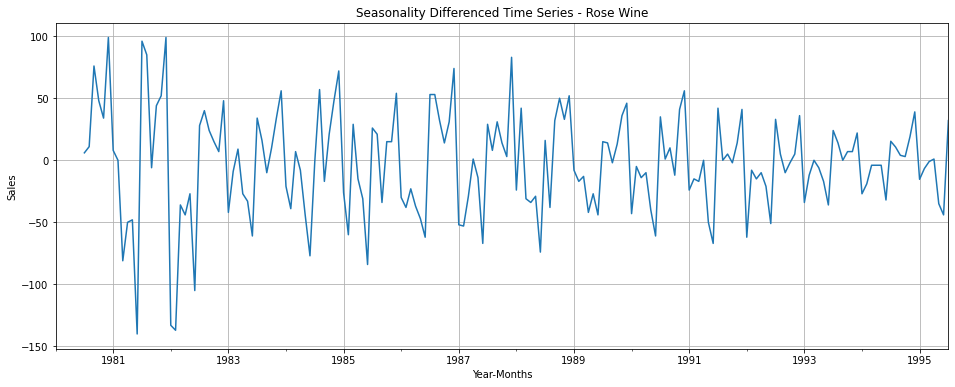

In [687]:
print('Figure No. 52')
(df_Rose['Rose'].diff(6)).plot()
plt.xlabel('Year-Months')
plt.ylabel('Sales')
plt.title('Seasonality Differenced Time Series - Rose Wine')
plt.grid();

Figure No. 53


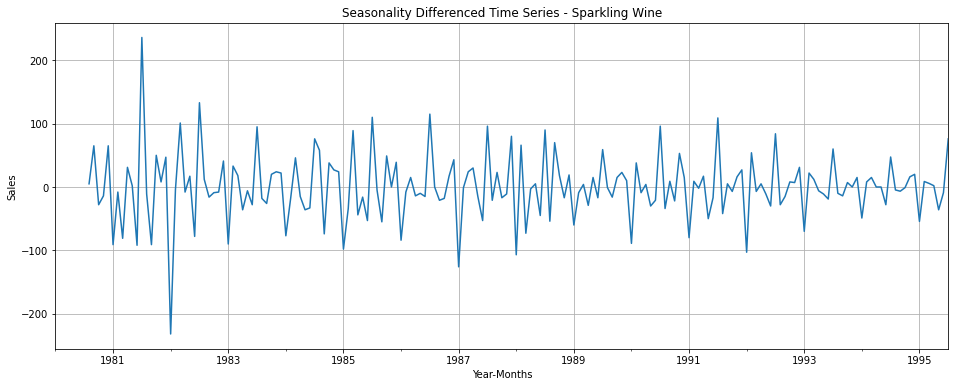

In [689]:
print('Figure No. 53')
(df_Rose['Rose'].diff(6).diff()).plot()
plt.xlabel('Year-Months')
plt.ylabel('Sales')
plt.title('Seasonality Differenced Time Series - Sparkling Wine')
plt.grid();

Figure No. 54


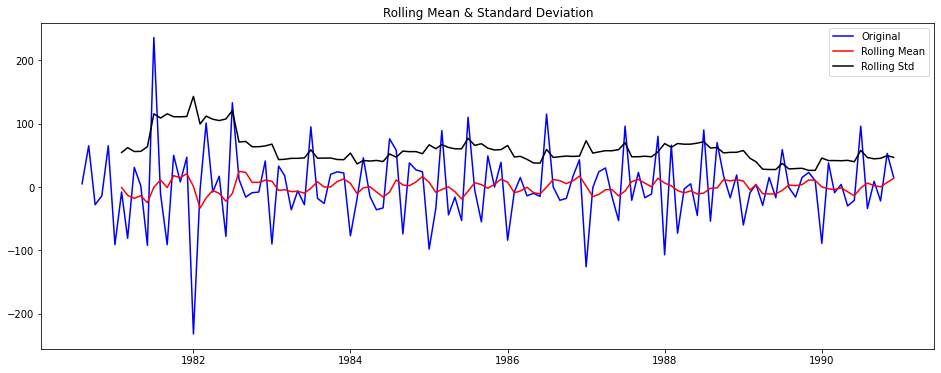

Results of Dickey-Fuller Test:
Test Statistic                -6.882869e+00
p-value                        1.418693e-09
#Lags Used                     1.300000e+01
Number of Observations Used    1.110000e+02
Critical Value (1%)           -3.490683e+00
Critical Value (5%)           -2.887952e+00
Critical Value (10%)          -2.580857e+00
dtype: float64 



In [692]:
print('Figure No. 54')
test_stationarity((train_rose['Rose'].diff(6).dropna()).diff(1).dropna())

Figure No. 55


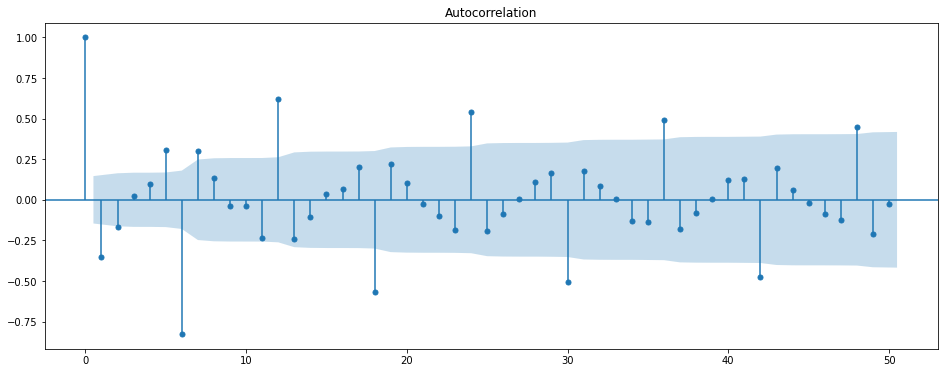

In [694]:
print('Figure No. 55')
plot_acf((df_Rose['Rose'].diff(6).dropna()).diff(1).dropna(),lags=50);

Figure No. 56


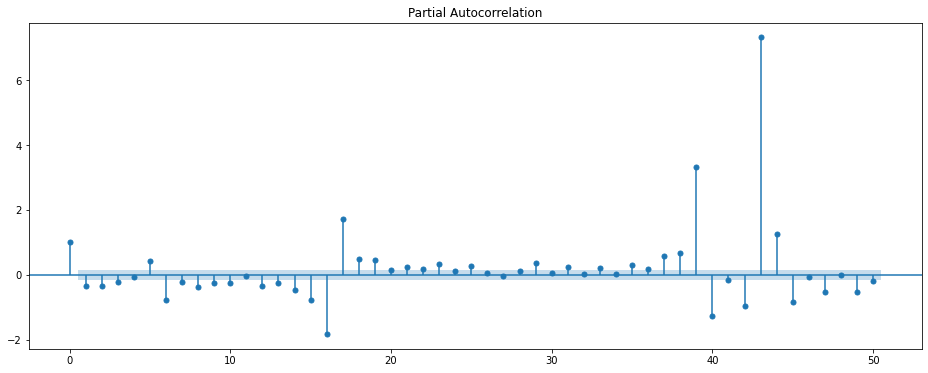

In [696]:
print('Figure No. 56')
plot_pacf((df_Rose['Rose'].diff(6).dropna()).diff(1).dropna(),lags=50);

In [704]:
manual_SARIMA_Rose = sm.tsa.statespace.SARIMAX(train_rose['Rose'].values,
                                order=(4, 1, 2),
                                seasonal_order=(2, 1, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_rose = manual_SARIMA_Rose.fit(maxiter=1000)
print(results_manual_SARIMA_rose.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(4, 1, 2)x(2, 1, 2, 6)   Log Likelihood                -482.916
Date:                           Sat, 21 May 2022   AIC                            987.832
Time:                                   00:24:42   BIC                           1017.437
Sample:                                        0   HQIC                           999.838
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3654      0.576     -0.635      0.526      -1.494       0.763
ar.L2         -0.4304      0.263     -1.634

In [705]:
predicted_manual_SARIMA_rose = results_manual_SARIMA_rose.get_forecast(steps=len(test_rose))

In [707]:
rmse_manual_SARIMA_rose = metrics.mean_squared_error(test_rose['Rose'],predicted_manual_SARIMA_rose.predicted_mean,squared=False)
print(rmse_manual_SARIMA_rose)

23.793584890899407


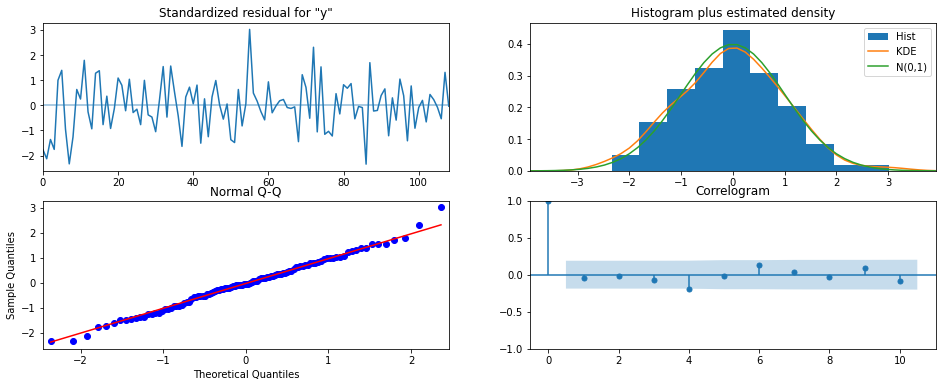

In [710]:
results_manual_SARIMA_rose.plot_diagnostics();

In [712]:
temp5 = pd.DataFrame({'RMSE': [rmse_manual_SARIMA_rose]}
                           ,index=['ManualSARIMA(4,1,2)(2,1,2,6)'])


arima_res_rose = pd.concat([arima_res_rose,temp5])

In [714]:
arima_res_rose.drop_duplicates(inplace=True)

In [715]:
arima_res_rose

RMSE
AutoARIMA(3,1,3)              15.987645
AutoSARIMA(2,1,4)(4,0,4,6)    26.110376
manualARIMA(4,1,2)            33.950141
ManualSARIMA(4,1,2)(2,1,2,6)  23.793585

### Build a table with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [717]:
resultsDf_rose = pd.concat([resultsDf_rose, arima_res_rose])
resultsDf_rose.drop_duplicates(inplace=True)

In [718]:
resultsDf_rose

RMSE
RegressionOnTime                                    15.268955
NaiveModel                                          79.718773
SimpleAverage                                       53.460570
2pointTrailingMovingAverage                         11.529278
4pointTrailingMovingAverage                         14.451403
6pointTrailingMovingAverage                         14.566327
9pointTrailingMovingAverage                         14.727630
Alpha=0.098,SimpleExponentialSmoothing              36.796242
Alpha=0.99,SimpleExponentialSmoothing               79.498734
AutoARIMA(3,1,3)                                    15.987645
AutoSARIMA(2,1,4)(4,0,4,6)                          26.110376
manualARIMA(4,1,2)                                  33.950141
Alpha=0.088,Beta=1.425 e^-5,Gamma=0.0013, Tripl...  14.275203
ManualSARIMA(4,1,2)(2,1,2,6)                        23.793585

In [719]:
resultsDf_spark.sort_values(by='RMSE')

RMSE
Alpha=0.111,Beta=0.049,Gamma=0.395,TripleExpone...   383.278793
2pointTrailingMovingAverage                          813.400684
AutoSARIMA(2,1,3)(2,0,3,6)                           824.803600
4pointTrailingMovingAverage                         1156.589694
ManualSARIMA(3,1,2)(2,1,2,6)                        1241.167488
Alpha=0.02,Beta=0.5,DoubleExponentialSmoothing      1274.630824
SimpleAverage                                       1275.081804
Alpha=0.02,SimpleExponentialSmoothing               1279.495201
6pointTrailingMovingAverage                         1283.927428
Alpha=0.05,SimpleExponentialSmoothing               1316.034674
9pointTrailingMovingAverage                         1346.278315
AutoARIMA(2,1,1)                                    1375.191113
manualARIMA(3,1,2)                                  1378.786317
RegressionOnTime                                    1389.135175
NaiveModel                                          3864.279352

In [720]:
resultsDf_rose.sort_values(by='RMSE')

RMSE
2pointTrailingMovingAverage                         11.529278
Alpha=0.088,Beta=1.425 e^-5,Gamma=0.0013, Tripl...  14.275203
4pointTrailingMovingAverage                         14.451403
6pointTrailingMovingAverage                         14.566327
9pointTrailingMovingAverage                         14.727630
RegressionOnTime                                    15.268955
AutoARIMA(3,1,3)                                    15.987645
ManualSARIMA(4,1,2)(2,1,2,6)                        23.793585
AutoSARIMA(2,1,4)(4,0,4,6)                          26.110376
manualARIMA(4,1,2)                                  33.950141
Alpha=0.098,SimpleExponentialSmoothing              36.796242
SimpleAverage                                       53.460570
Alpha=0.99,SimpleExponentialSmoothing               79.498734
NaiveModel                                          79.718773

### Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

1. We have finalized to build our forecasting model on Triple exponential smoothening with alpha, beta and gamma values 0.111,0.049 and 0.395 respectively for sparkling wine data set. It has the lowest of the RMSE values of all the models that we built.
2. 2-Point trailing moving average model has the lowest RMSE value for our Rose wine data set.

In [721]:
fullmodel1 = ExponentialSmoothing(df_Spark,trend='additive',seasonal='multiplicative').fit(smoothing_level=0.111,smoothing_trend=0.049,smoothing_seasonal=0.395)

In [722]:
RMSE_fullmodel1 = metrics.mean_squared_error(df_Spark['Sparkling'],fullmodel1.fittedvalues,squared=False)

print('RMSE:',RMSE_fullmodel1)

RMSE: 353.059392061868


In [723]:
prediction_1 = fullmodel1.forecast(12)

In [724]:
prediction_1

1995-08-01    1865.617908
1995-09-01    2412.126875
1995-10-01    3169.591947
1995-11-01    3806.399339
1995-12-01    5927.881333
1996-01-01    1255.581430
1996-02-01    1593.284910
1996-03-01    1837.709752
1996-04-01    1814.895712
1996-05-01    1655.532098
1996-06-01    1595.687104
1996-07-01    1956.814051
Freq: MS, dtype: float64

Figure No. 57


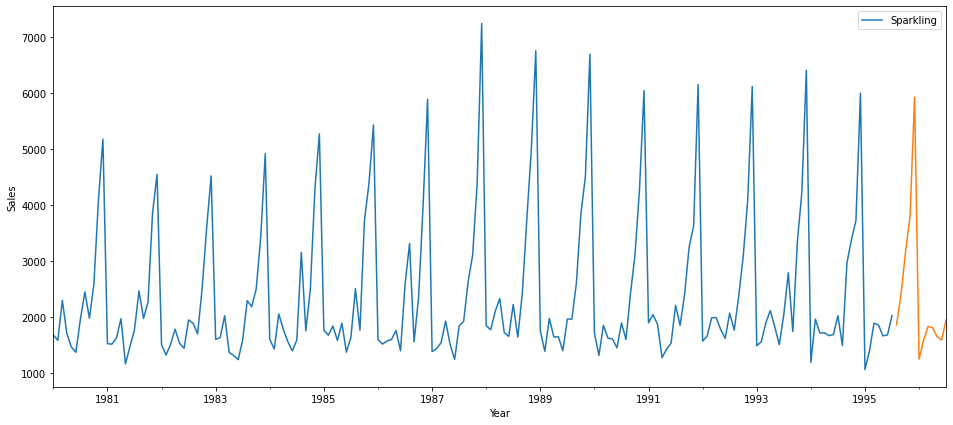

In [726]:
print('Figure No. 57')
df_Spark.plot()
prediction_1.plot()
plt.xlabel('Year')
plt.ylabel('Sales');

In [727]:
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(fullmodel1.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*np.std(fullmodel1.resid,ddof=1)})
pred_1_df.head()

lower_CI   prediction     upper_ci
1995-08-01  1171.771040  1865.617908  2559.464777
1995-09-01  1718.280006  2412.126875  3105.973744
1995-10-01  2475.745078  3169.591947  3863.438816
1995-11-01  3112.552470  3806.399339  4500.246208
1995-12-01  5234.034464  5927.881333  6621.728202

Figure No. 57


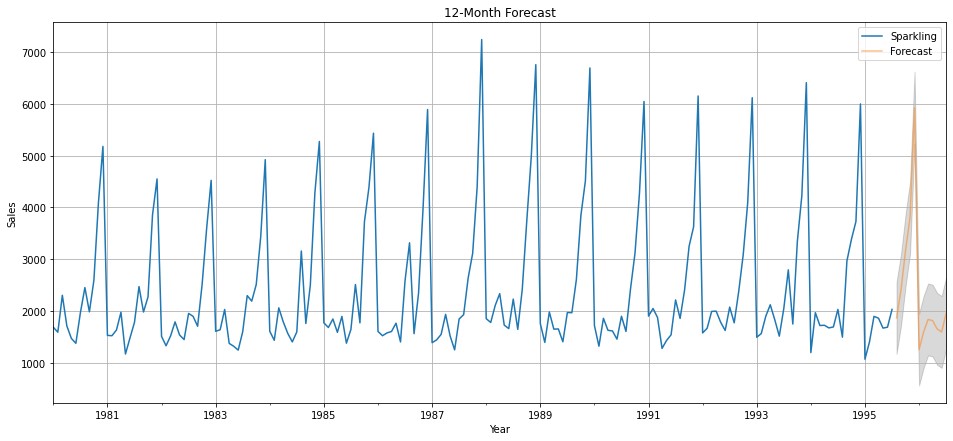

In [728]:
print('Figure No. 57')
axis = df_Spark.plot(label='Actual')
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_1_df.index, pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.title('12-Month Forecast')
plt.grid()
plt.show()

In [392]:
from statsmodels.tsa.arima_model import ARMA

In [486]:
fullmodel2 = ARMA(df_Rose.Rose, order=(0,2)).fit()

In [729]:
print(fullmodel2.summary())

                              ARMA Model Results                              
Dep. Variable:                   Rose   No. Observations:                  187
Model:                     ARMA(0, 2)   Log Likelihood                -918.314
Method:                       css-mle   S.D. of innovations             32.822
Date:                Sat, 21 May 2022   AIC                           1844.628
Time:                        00:54:15   BIC                           1857.552
Sample:                    01-01-1980   HQIC                          1849.865
                         - 07-01-1995                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         89.9107      4.051     22.193      0.000      81.970      97.851
ma.L1.Rose     0.5098      0.073      7.004      0.000       0.367       0.653
ma.L2.Rose     0.1828      0.064      2.839      0.0

In [734]:
start_index = '1995-07-1'
end_index = '1996-08-1'

In [735]:
prediction_2 = fullmodel2.predict(start=start_index, end=end_index)
prediction_2

1995-07-01    70.110008
1995-08-01    81.714049
1995-09-01    88.428351
1995-10-01    89.910663
1995-11-01    89.910663
1995-12-01    89.910663
1996-01-01    89.910663
1996-02-01    89.910663
1996-03-01    89.910663
1996-04-01    89.910663
1996-05-01    89.910663
1996-06-01    89.910663
1996-07-01    89.910663
1996-08-01    89.910663
Freq: MS, dtype: float64

In [736]:
rmse_2 = metrics.mean_squared_error(df_Rose['Rose'],fullmodel2.fittedvalues,squared=False)
print("For 2 point Moving Average Model forecast on the Data,  RMSE is %3.3f" %(rmse_2))

For 2 point Moving Average Model forecast on the Data,  RMSE is 32.831


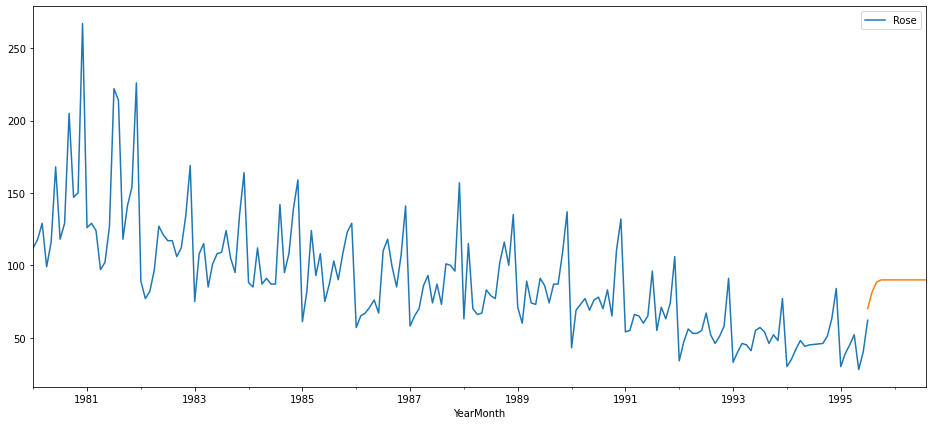

In [737]:
df_Rose.plot()
prediction_2.plot();

In [738]:
pred_2_df = pd.DataFrame({'lower_CI':prediction_2 - 1.96*np.std(fullmodel2.resid,ddof=1),
                          'prediction':prediction_2,
                          'upper_ci': prediction_2 + 1.96*np.std(fullmodel2.resid,ddof=1)})
pred_2_df.head()

lower_CI  prediction    upper_ci
1995-07-01   5.587536   70.110008  134.632481
1995-08-01  17.191576   81.714049  146.236521
1995-09-01  23.905879   88.428351  152.950824
1995-10-01  25.388191   89.910663  154.433136
1995-11-01  25.388191   89.910663  154.433136

Figure No. 58


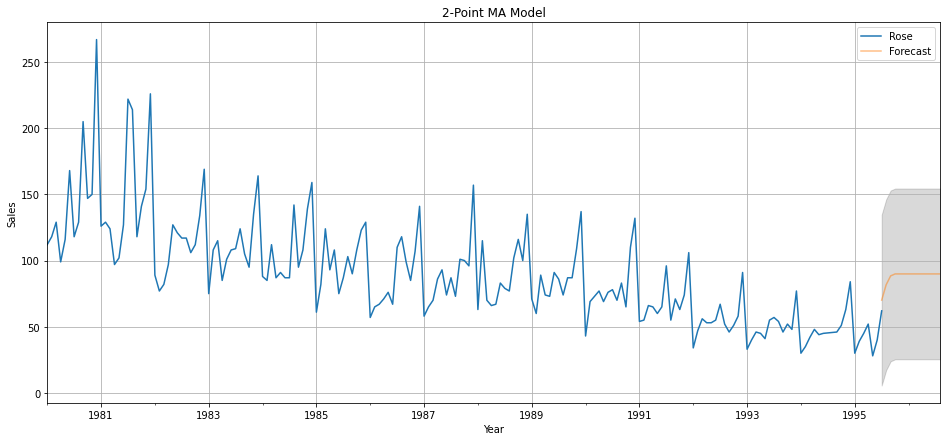

In [740]:
print('Figure No. 58')
axis = df_Rose.plot(label='Actual')
pred_2_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_2_df.index, pred_2_df['lower_CI'], pred_2_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.title('2-Point MA Model')
plt.grid()
plt.show()